## This notebook serves the purpose of performing the general linear model on the respective dataset. 

### **0. Introduction**

First we will need to load the data. We are now dealing with the preprocessed data. The preprocessing has been done with using [fMRI-prep](https://fmriprep.org/en/stable/). fMRIprep describes itself as such "(...)It performs basic processing steps (coregistration, normalization, unwarping, noise component extraction, segmentation, skullstripping etc.) providing outputs that can be easily submitted to a variety of group level analyses, including task-based or resting-state fMRI, graph theory measures, surface or volume-based statistics, etc."

Thus, we will now perform our first level model. The predictors are the respective categories of the stimuli. The dependent variable is the brain activity in a given voxel.
So lets start by loading the data! For now we are dealing with the first five runs of subject one, for the first session in the imagery task.

In [8]:
import os
os.chdir('/mnt/c/Users/janos/git/sessions_2/sub02-ses-01-imagery')

We can now take a look at all the files we have. In total, we have five runs. For each run, we have .json file, a nii.gz file and a confounds.tsv file. In the Dataset_Exploration notebook we had a similar structure. But instead of the events.tsv file, we now have the confounds file. The confound file contain the regressors of no interest. Those are variables, that we should explicitly exclude from our first level model and are computed during the preprocessing. We also see that we have preprocessed data, because the respective file names carry the additional "preproc". 

In [3]:
ls

sub-02_ses-imagery01_task-imagery_run-01_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-01_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-02_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-02_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-03_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-03_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-04_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-04_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-05_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-05_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-06_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-06_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-07_desc-preproc_bold.nii.gz*
sub-02_ses-imagery01_task-imagery_run-07_desc-preproc_confounds.tsv*
sub-02_ses-imagery01_task-imagery_run-08_desc-pr

We can now load one sample confounds.tsv file, to see what regressors of no interest are

In [24]:
import pandas as pd
confounds=pd.read_csv('sub-02_ses-imagery01_task-imagery_run-01_desc-preproc_confounds.tsv',sep='\t')
confounds

global_signal  global_signal_derivative1  \
0       465.053008                        NaN   
1       463.413643                  -1.639365   
2       464.594337                   1.180694   
3       466.359479                   1.765142   
4       465.121055                  -1.238424   
..             ...                        ...   
222     469.326172                   0.942341   
223     470.309706                   0.983534   
224     469.507817                  -0.801889   
225     468.313968                  -1.193849   
226     468.586607                   0.272639   

     global_signal_derivative1_power2  global_signal_power2         csf  \
0                                 NaN         216274.300159  885.110101   
1                            2.687517         214752.204708  864.049400   
2                            1.394038         215847.898098  865.805583   
3                            3.115726         217491.163831  864.982658   
4                            1.533694         216337.596040  864.238436   
..                                ...                   ...         ...   
222                          0.888007         220267.055684  857.327051   
223                          0.967340         221191.219748  859.685867   
224                          0.643026         220437.590209  858.419284   
225                          1.425275         219317.972698  859.302773   
226                          0.074332         219573.408539  859.596056   

     csf_derivative1     csf_power2  csf_derivative1_power2  white_matter  \
0                NaN  783419.891693                     NaN    513.176326   
1         -21.060702  746581.365013              443.553161    512.923631   
2           1.756183  749619.306848                3.084179    513.398757   
3          -0.822924  748194.998952                0.677205    514.747619   
4          -0.744222  746908.074726                0.553866    514.638035   
..               ...            ...                     ...           ...   
222        -0.654285  735009.672572                0.428089    516.693399   
223         2.358816  739059.789556                5.564011    517.528972   
224        -1.266583  736883.666613                1.604233    516.620051   
225         0.883489  738401.255048                0.780553    515.382435   
226         0.293283  738905.378733                0.086015    514.993618   

     white_matter_derivative1  ...  aroma_motion_12  aroma_motion_14  \
0                         NaN  ...        -1.716092        -0.973426   
1                   -0.252695  ...        -2.059673        -0.500599   
2                    0.475126  ...        -2.887505        -1.602738   
3                    1.348861  ...        -0.806565        -0.856620   
4                   -0.109584  ...        -1.017611        -1.582038   
..                        ...  ...              ...              ...   
222                  0.919794  ...         0.714489         0.023589   
223                  0.835572  ...         0.819981        -0.098468   
224                 -0.908921  ...         1.676984        -0.391254   
225                 -1.237616  ...         1.629190        -1.304270   
226                 -0.388817  ...         0.153123        -0.782766   

     aroma_motion_16  aroma_motion_29  aroma_motion_30  aroma_motion_32  \
0          -2.848921         3.966949         0.474933         1.112197   
1          -2.138993         0.935166         2.141346        -1.035511   
2          -0.594408         2.620752        -0.027473        -0.914752   
3          -1.976751         2.258002         2.359768         0.379894   
4          -0.976332         2.734068         1.071105        -1.541231   
..               ...              ...              ...              ...   
222         1.911857        -0.447125        -0.289088         0.126655   
223         2.067961        -1.628424         1.673310         0.881957   
224         2.241975        -0.424690         0.79

<div class="alert alert-block alert-success">
While there are certainly a lot of confound variable (243, to be exact) we are not including all of them in our first level analysis. For the course purpose, we will only include the rotational parameters pitch, yaw, roll [rot x, rot y and rot z], the translational axes x, y and z [trans x, trans y, trans z] and the global signal.</div>

We can extract the respective columns from our *confounds* dataframe and create a new one, that only containts the regressors of no interest

In [25]:
reg_no_interest = confounds[['global_signal', 'trans_x','trans_z','trans_y','rot_x','rot_y','rot_z']].copy()

In [26]:
reg_no_interest

global_signal   trans_x   trans_z   trans_y     rot_x     rot_y     rot_z
0       465.053008 -0.065257  0.021237  0.037526 -0.001281  0.000591  0.001025
1       463.413643 -0.060637 -0.029944  0.042860 -0.001124  0.000568  0.000663
2       464.594337 -0.054088 -0.022643  0.062187 -0.001219  0.000394  0.000615
3       466.359479 -0.040455 -0.029937  0.014951 -0.001135  0.000154  0.000538
4       465.121055 -0.037606 -0.026106  0.069178 -0.001349  0.000276  0.000538
..             ...       ...       ...       ...       ...       ...       ...
222     469.326172  0.022626 -0.076282  0.074785 -0.000122  0.001392  0.000790
223     470.309706  0.013941 -0.065421  0.088191 -0.000476  0.001583  0.000790
224     469.507817  0.030253 -0.039828  0.100134 -0.000205  0.001706  0.000790
225     468.313968  0.020562 -0.079380  0.063538 -0.000381  0.001583  0.000853
226     468.586607  0.012307 -0.052041  0.117635 -0.000332  0.001592  0.000934

[227 rows x 7 columns]

This looks good! Now that we took care of the confounds, its time to import nilearns FirstLevelModel function.
This function creates a **design matrix** and uses the information provided by the events file.

The function requires a lot of different parameters to be set.

In [10]:
from nilearn.glm.first_level import FirstLevelModel

For the sake of the course purpose, we will stick to the default settings. Only t_r (= the time of repetition of acquisitions) and the hrf_model (hemodynamic response model) need to be adapted.

<div class="alert alert-block alert-success">
We get the time of repetition from the respective json file!.</div>

In [7]:
import json
with open('sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_bold.json') as json_file:
    meta_file = json.load(json_file)
meta_file  

{'DelayTime': 0.09749999999999992,
 'RepetitionTime': 2.0,
 'SkullStripped': False,
 'SliceTimingCorrected': True,
 'StartTime': 0.951,
 'TaskName': 'imagery'}

The t_r is 2.0 seconds. Now that we have this parameter we are almost good to go. For the first level model the hrf model is set to SPM, so we also have this information.

In [18]:
fmri_glm = FirstLevelModel(t_r = 2.0, hrf_model = 'spm',
                           slice_time_ref=0.0, 
                           drift_model='cosine',
                           high_pass=.01, 
                           noise_model='ar1',
                           minimize_memory = False)

As mentioned before, we need the events.tsv file for the FirstLevelModel and thus the design matrix. Lets load this file so we can continue.

In [29]:
events=pd.read_csv('/home/jpauli/ds001506/sub-02/ses-imagery01/func/sub-02_ses-imagery01_task-imagery_run-01_events.tsv',sep='\t')
events

onset  duration  trial_no  event_type  category_id category_name  \
0      0.0      32.0       1.0          -1          NaN           NaN   
1     32.0       4.0       2.0           1    2437136.0     n02437136   
2     36.0       8.0       2.0           2    2437136.0     n02437136   
3     44.0       3.0       2.0           3    2437136.0     n02437136   
4     47.0       1.0       2.0           4    2437136.0     n02437136   
..     ...       ...       ...         ...          ...           ...   
101  432.0       4.0      27.0           1    2951358.0     n02951358   
102  436.0       8.0      27.0           2    2951358.0     n02951358   
103  444.0       3.0      27.0           3    2951358.0     n02951358   
104  447.0       1.0      27.0           4    2951358.0     n02951358   
105  448.0       6.0      28.0          -2          NaN           NaN   

     category_index  response_time  evaluation  
0               NaN            NaN         NaN  
1              14.0       46.92666         4.0  
2              14.0       46.92666         4.0  
3              14.0       46.92666         4.0  
4              14.0       46.92666         4.0  
..              ...            ...         ...  
101            22.0            NaN         4.0  
102            22.0            NaN         4.0  
103            22.0            NaN         4.0  
104            22.0            NaN         4.0  
105             NaN            NaN         NaN  

[106 rows x 9 columns]

From this file, we need the to save the **onset**, **duration** and the **trial_type**. However, we do not have the trial_type column yet. This column should tell us which respective trial we are dealing with at a given timestap. This is already given in the event_type column, but we need to translate the integers to an actual informative string. Also, we cannot simply assign every imagery trial the same value. We want to differantiate between the different stimuli. 
So before extracting the onset and duration column, we will first create the trial_type column and then proceed. This column indicates, when rest, cue presentation, imagery evaluation or inter-trial and post rest periods happened. Also it informs us, which exact stimuli was imagined.

In [30]:
trial_type = ['ABC']*len(events['event_type'])
category = events['category_id']
for idx, x in enumerate(events['event_type']):
    if x == -1:
        trial_type[idx] = 'Rest'
    if x == 1:
        trial_type[idx] = 'Cue presentation'
    if x == 2:
        trial_type[idx] = 'imagery' + str(category[idx])
    if x == 3:
        trial_type[idx] = 'Imagery evaluation'
    if x == 4 or x == -2:
        trial_type[idx] = 'inter-trial and post rest period'
        
        
    

In [31]:
event_sub_ses_run_01 = events[['onset','duration']]
event_sub_ses_run_01['trial_type'] = trial_type
event_sub_ses_run_01

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


onset  duration                        trial_type
0      0.0      32.0                              Rest
1     32.0       4.0                  Cue presentation
2     36.0       8.0                  imagery2437136.0
3     44.0       3.0                Imagery evaluation
4     47.0       1.0  inter-trial and post rest period
..     ...       ...                               ...
101  432.0       4.0                  Cue presentation
102  436.0       8.0                  imagery2951358.0
103  444.0       3.0                Imagery evaluation
104  447.0       1.0  inter-trial and post rest period
105  448.0       6.0  inter-trial and post rest period

[106 rows x 3 columns]

The last thing we need is the fMRI img. We get this by loading the functional image and then applying nilearns mean_img function to it.

In [32]:
path_func_img = '/mnt/c/Users/janos/git/sessions_2/sub02-ses-01-imagery' 
fmri_img = os.path.join(path_func_img ,'sub-02_ses-imagery01_task-imagery_run-01_desc-preproc_bold.nii.gz')

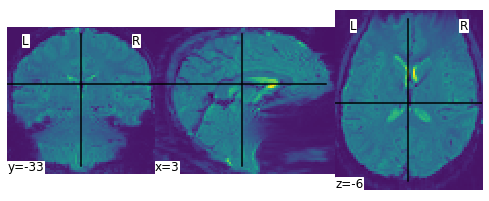

In [33]:
from nilearn.image import mean_img 
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_glass_brain
mean_img_ = mean_img(fmri_img)
plot_img(mean_img_)

### **1.0 running the model**

Now it is time to run our defined first level model. We are using our mean fMRI img and our event and confound file. This results in a *design matrix*. The design matrix is informing us about a given activity for the respective regressor and for a given scan number. We have a recording frequency of 2 seconds. The whole paradigm took about 400 seconds (see: Dataset_Exploration.ipynb). This is why the only have 200 scan numbers on our y-axis.

In [34]:
fmri_glm = fmri_glm.fit(fmri_img, event_sub_ses_run_01, reg_no_interest)


<AxesSubplot:label='conditions', ylabel='scan number'>

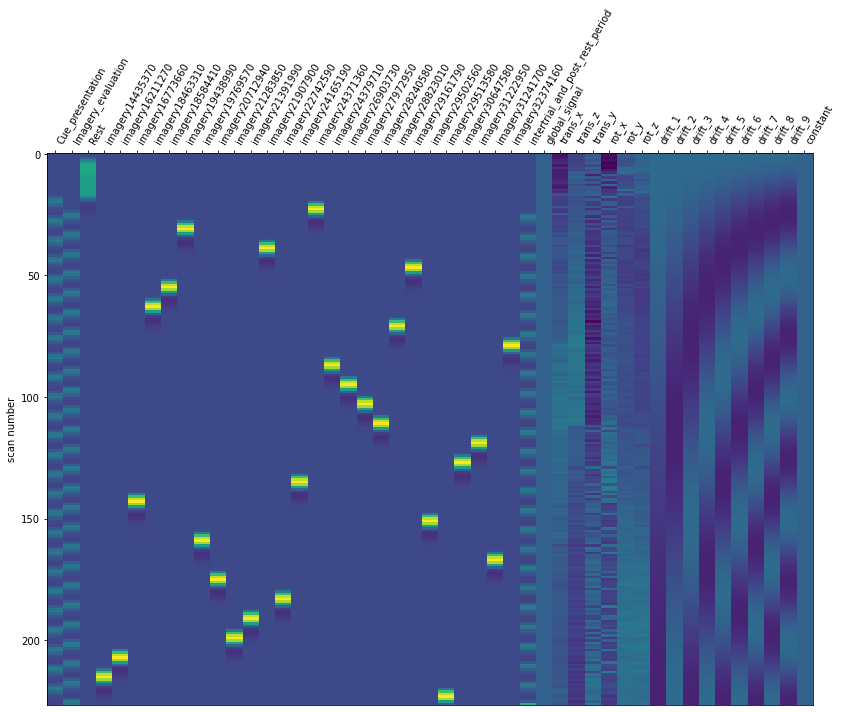

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
design_matrix = fmri_glm.design_matrices_[0]
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)


We can also plot the expected response for a given category. This tells us at which time there was a BOLD response for the respective category.

Text(0.5, 1.0, 'Expected Response for category 14435370')

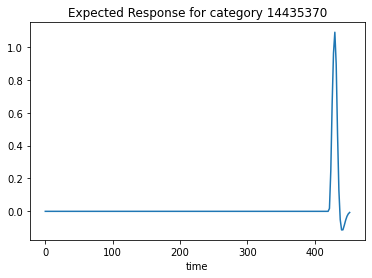

In [36]:
plt.plot(design_matrix['imagery14435370'])
plt.xlabel('time')
plt.title('Expected Response for category 14435370')


We can now save the design matrix in a dedicated folder.

outdir = '/mnt/c/Users/janos/OneDrive/Dokumente/Frankfurt Master/Forschungsmodul/Design_matrix'
from os.path import join
plot_design_matrix(design_matrix, output_file=join(outdir, 'design_matrix.png'))

### **2.0 Detection of significant voxels**

In order to estimate our Betas of the GLM, we need to calculate the contrasts for all conditions. By doing this, we are weighting the columns to discover the associated statistics.

This requires some data wrangling. First, we need to extract all unique values from our *event* file, so we only have the stimuli presented in the paradigm. Before, we have to sort the values, because our design matrix follows a ascending order. Then we remove the one NaN from this list. After that, we will create the variable **conditions**. This list containts the prefix "active", so we know we are dealing with an activated brain region and is added by the respective condition name.

Then an array of the length of all regressors is created. For each of our regressors of interest, so for all our conditions, i.e. imagery stimuli, a weight is assigned. One thing is very important here: Our design matrix tells us, that the first three regressors are **NOT** the imagery conditions but rather the cue presentation, rest and imagery evaluation. Due to this, we have to start by assigning the first weight to the **fourth** 0 zero of our array. This is then combined into a dictionary, so it can serve as in input to the nilearn function **plot_contrast_matrix**.

In [37]:
import math
events.sort_values(by=['category_id'], inplace=True,ascending=True) 
con = events.category_id.unique().tolist()
con_no_NaN = [item for item in con if not(math.isnan(item)) == True]
 


In [38]:
conditions = ['spaceholder']*len(con_no_NaN)
for pos, x in enumerate(con_no_NaN):
    conditions[pos] = 'active -' + str(x)

In [39]:
from numpy import array
array_a = array([0]*design_matrix.shape[1])
array_a[3] = 1

arr = []
i = 4
k=1
while i < len(conditions)+4:
    arr.append(array_a)
    if len(arr) >= k:
        array_a = array([0]*design_matrix.shape[1])
        array_a[i] = 1
        i = i+1
        k=k+1
    else:
        array_a = array([0]*design_matrix.shape[1])
        i=i+1
        continue
   

In [40]:
condition = dict.fromkeys(conditions)

In [41]:
i=0
for k,x in condition.items():
    condition[k] = arr[i]
    i=i+1


In [42]:
condition

{'active -1443537.0': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1621127.0': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1677366.0': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1846331.0': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1858441.0': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1943899.0': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

After finishing the data wrangling, it is finally time to compute the contrasts and plot the coefficients.

<div class="alert alert-block alert-success">
For now, we will plot and compute the contrast matrix for the condition 'active - 16773660'. </div>

<AxesSubplot:label='conditions'>

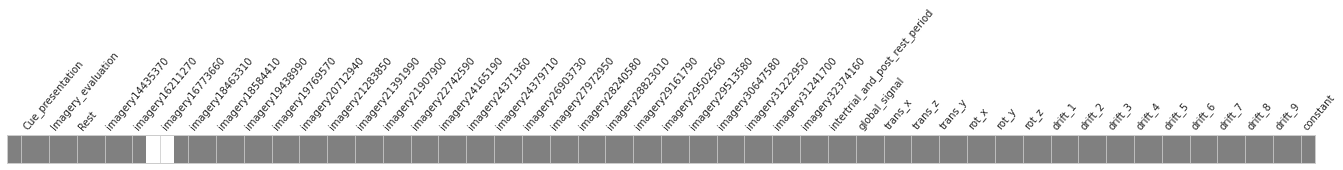

In [67]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(condition['active -1677366.0'], design_matrix=design_matrix)

We can also compute the effect size for the contrast. This must be done, because the BOLD signal unit inherits no statistical guarantee, mainly because the associated variance is not taken into account. We can compute a t test and z-transform the values, meaning the mean is equal to 0 and the variance is equal to 1 across voxels.

In [24]:
eff_map = fmri_glm.compute_contrast(condition['active -1677366.0'],
                                    output_type='effect_size')

In [25]:
z_map = fmri_glm.compute_contrast(condition['active -1677366.0'],
                                  output_type='z_score')

<div class="alert alert-block alert-success">
The z map serves combined with the condition labels as the input for nilearns decoding pipeline.
</div>

Its time to plot the z_map on top of the fMRI img. There are several approaches to define statistical tresholds. We will control for the false discovery rate, meaning the amount of false discoveries relative to all detections.

False Discovery rate = 0.05 threshold: 2.574


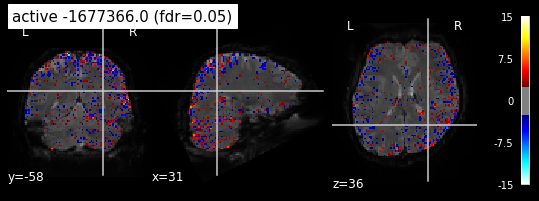

In [26]:
from nilearn.glm.thresholding import threshold_stats_img
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=mean_img_, threshold=threshold,
              display_mode='ortho', cut_coords=None, black_bg=True,
              title='active -1677366.0 (fdr=0.05)')


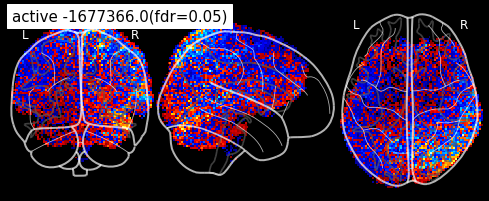

In [27]:
plot_glass_brain(z_map, threshold=threshold, black_bg=True, plot_abs=False,
                 title='active -1677366.0(fdr=0.05)')


## **3.0 Performing the glm for all runs**

Now that we demonstrated the process for one single run, we want to execute the GLM for all runs we have.
First, we can start by saving all functional images in one list.

In [28]:
fmri_img_all_runs = []

    
for file in os.listdir():
     filename = file
     if filename.endswith(".gz"): 
         fmri_img_all_runs.append(file)
         continue
     else:
         continue


In [29]:
fmri_img_all_runs

['sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_bold.nii.gz',
 'sub-01_ses-imagery01_task-imagery_run-02_desc-preproc_bold.nii.gz',
 'sub-01_ses-imagery01_task-imagery_run-03_desc-preproc_bold.nii.gz',
 'sub-01_ses-imagery01_task-imagery_run-04_desc-preproc_bold.nii.gz',
 'sub-01_ses-imagery01_task-imagery_run-05_desc-preproc_bold.nii.gz']

Compute the mean_img for every image we just saved in the *fmri_img_all_runs* variable.

In [30]:
mean_img_all = []
for pos, x in enumerate(fmri_img_all_runs):
    m = mean_img(fmri_img_all_runs[pos])
    mean_img_all.append(m)

Save all confounds

In [31]:
confounds_all_runs = []

for file in os.listdir():
    filename = file
    if filename.endswith(".tsv"):
        confounds_all_runs.append(pd.read_csv(file,sep='\t'))
        continue
    else:
        continue

And then extract all regressors of no interest!

In [32]:
reg_no_interest_all = []

for x in confounds_all_runs:
    
    reg_no_interest_all.append(x[['global_signal', 'trans_x','trans_z','trans_y','rot_x','rot_y','rot_z']].copy())

Load all event files

In [33]:
os.chdir('/home/jpauli/ds001506/sub-01/ses-imagery01/func')
events_all_runs = []

for file in os.listdir():
    filename = file
    if filename.endswith(".tsv"):
        events_all_runs.append(pd.read_csv(file,sep='\t'))
        continue
    else:
        continue
    

Now once again we have to get the trialtype aka the stimuli seperated from the event files. For this case I created the *trialtype* function. After that, we extract onset and duration and create a new list called regressors_of_interest. This list contains the onset and duration of our regressors.

In [54]:
def trialtype(event):
    trial_type = ['SPACE']*len(event['event_type'])
    category = event['category_id']
    for idx, x in enumerate(event['event_type']):
        if x == -1:
            trial_type[idx] = 'Rest'
        if x == 1:
            trial_type[idx] = 'Cue presentation'
        if x == 2:
            trial_type[idx] = 'imagery' + str(category[idx])
        if x == 3:
            trial_type[idx] = 'Imagery evaluation'
        if x == 4 or x == -2:
            trial_type[idx] = 'inter-trial and post rest period'
    return trial_type

In [35]:
stimuli_all = []

for files, events in enumerate(events_all_runs):
    stimuli_all.append(trialtype(events_all_runs[files]))

In [36]:
regressors_of_interest = []

for files,events in enumerate(events_all_runs):
    regressors_of_interest.append(events_all_runs[pos][['onset','duration']])
    regressors_of_interest[files]['trial_type'] = stimuli_all[files]

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<div class="alert alert-block alert-success">
To proceed, it is necessary to define the design matrices for the respective runs. This is done by using the make_first_level_design_matrix function from nilearn.glm.first_level module.</div>

First, we need to define some parameters. The times of repetition (T_R) as taken from the bold.json file.
The frame times. This is equal to the number of scans multiplied by the times of repetition.
The number of scans is simply the duration of the whole run divided by the T_R.

In [43]:
from numpy import arange
T_R = 2.0
n_scans = 227 
frame_times = arange(n_scans)*T_R
from nilearn.glm.first_level import make_first_level_design_matrix

Then, we just loop through our predefined variables and create a design matrix for each run.

In [38]:
from nilearn.glm.first_level import make_first_level_design_matrix
hrf_model = 'glover'
runs = [0,1,2,3,4]
X = []
for run, x in enumerate(runs):
    X.append(make_first_level_design_matrix(
    frame_times, regressors_of_interest[run], drift_model='polynomial', drift_order=3,
    add_regs=reg_no_interest_all[run], add_reg_names=None, hrf_model=hrf_model))

Next step is to simply create and then fit our first level model on the respective fmri images and matrices we just calculated.


  

In [44]:
glm = FirstLevelModel(t_r = T_R, hrf_model = 'spm',
                           slice_time_ref=0.0, 
                           drift_model='cosine',
                           high_pass=.01, 
                           noise_model='ar1',
                           minimize_memory = False)

In [40]:
os.chdir('/mnt/c/Users/janos/git/sub01-ses-01-imagery')
glm = glm.fit(fmri_img_all_runs, design_matrices=X)

Now we need to compute the contrasts. Since the stimuli are all the same for every run, we can just use the category list from above

<div class="alert alert-block alert-danger">
CAVE:

In the first example of running the glm for only one run, I first created a design matrix that contained 47 regressors. This is because there are the variables drift 1 to drift 9. However, when calculating the design matrices for each run, I only get the variables drift 1 to drift 3. Thats why I needed to adapt the contrast dictionary from run one. </div>

In [59]:
from numpy import array
array_a = array([0]*X[0].shape[1])
array_a[3] = 1

arr = []
i = 4
k=1
while i < len(conditions)+4:
    arr.append(array_a)
    if len(arr) >= k:
        array_a = array([0]*X[0].shape[1])
        array_a[i] = 1
        i = i+1
        k=k+1
    else:
        array_a = array([0]*X[0].shape[1])
        i=i+1
        continue

In [60]:
condition = dict.fromkeys(conditions)

In [61]:
i=0
for k,x in condition.items():
    condition[k] = arr[i]
    i=i+1

In [67]:
condition.shape

AttributeError: 'dict' object has no attribute 'shape'

from nilearn import plotting

from os import path

os.mkdir('/mnt/c/Users/janos/git/sub01-ses-01-imagery/z_maps')

write_dir = '/mnt/c/Users/janos/git/sub01-ses-01-imagery/z_maps'

print('Computing contrasts...')

for index, (contrast_id, contrast_val) in enumerate(condition.items()):
    print('  Contrast % 2i out of %i: %s' % (
        index + 1, len(condition), contrast_id))    
       Estimate the contasts. Note that the model implicitly computes a fixed
    effect across the two sessions
        z_map = glm.compute_contrast(
        contrast_val, output_type='z_score')

   write the resulting stat images to file
   z_image_path = path.join(write_dir, '%s_z_map.nii.gz' % contrast_id)
   
   z_map.to_filename(z_image_path)

## **4.0 Quality check**

### **4.1 Model evaluation**

Since we now calculated all contrasts, it is time to check the quality of the glm we produced and applied. Lets start with the model evaluation. We evalute the model by inspecting R-Squared. 

<div class="alert alert-block alert-success">
At first a anatomical reference image is plotted. To check if everything was modelled correct, we are expecting only voxels within grey matter areas to respond to the general linear model, leading to an increased R-square value.</div>

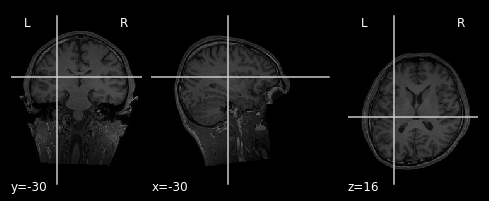

In [44]:
path_ref_img = '/home/jpauli/ds001506/sub-01/ses-anatomy/anat'
coordinates_anat = (-30,-30,16)
ref_anat_T1 = os.path.join(path_ref_img ,'sub-01_ses-anatomy_T1w.nii.gz')
plot_anat(ref_anat_T1, display_mode='ortho', cut_coords = coordinates_anat)

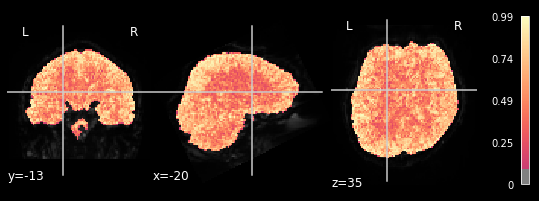

In [45]:
from nilearn import plotting
coordinates_func = (-20,-13,35)
plotting.plot_stat_map(glm.r_square[0], bg_img=mean_img_all[0], threshold=.1,
                       display_mode='ortho', cut_coords=coordinates_func, cmap='magma')

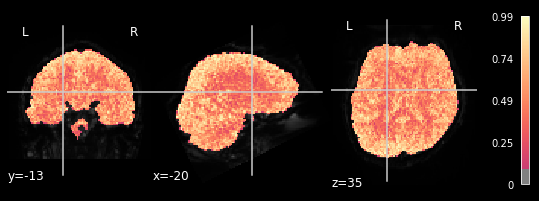

In [46]:
plotting.plot_stat_map(glm.r_square[1], bg_img=mean_img_all[1], threshold=.1,
                       display_mode='ortho', cut_coords=coordinates_func, cmap='magma')

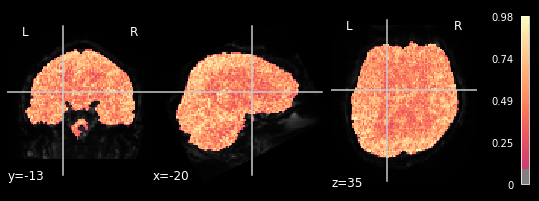

In [47]:
plotting.plot_stat_map(glm.r_square[2], bg_img=mean_img_all[2], threshold=.1,
                       display_mode='ortho', cut_coords=coordinates_func, cmap='magma')

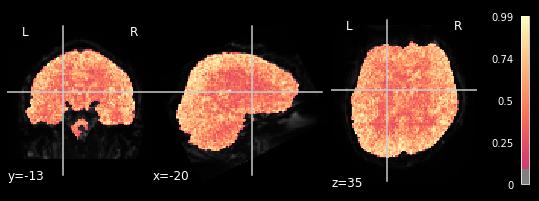

In [48]:
plotting.plot_stat_map(glm.r_square[3], bg_img=mean_img_all[3], threshold=.1,
                       display_mode='ortho', cut_coords=coordinates_func, cmap='magma')

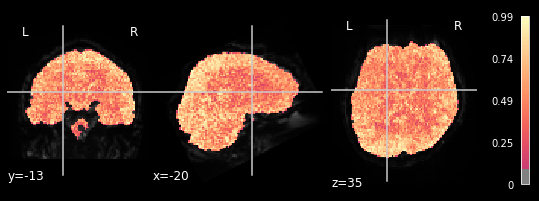

In [49]:
plotting.plot_stat_map(glm.r_square[4], bg_img=mean_img_all[4], threshold=.1,
                       display_mode='ortho', cut_coords=coordinates_func, cmap='magma')

We can observe the pattern, that R-square is relatively low when inspecting brain areas that mostly contain white matter. We want to inspect neural activtiy, and thus are interested in grey matter areas. This means, that only the voxels within the grey matter should respond to the general linear model, meaning that higher R-square values can be observed. This can be seen in all 5 plots, meaning our glm did exactly what it needed to do. 

Thus, we can continue with the quality check.

### **4.2 Comparing the results with literature**

Next step would be to check, if the results of all contrasts across runs is consistend with the literature on mental imagery. Meaning, can a similar activation pattern be seen in the z-map plots when comparing it to activation pattern, that are based on several other studies/meta analysis on mental imagery? To investigate this, I will plot the contrasts and then compare them to the activation maps on [neurosynth](https://neurosynth.org/analyses/terms/mental%20imagery/).

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


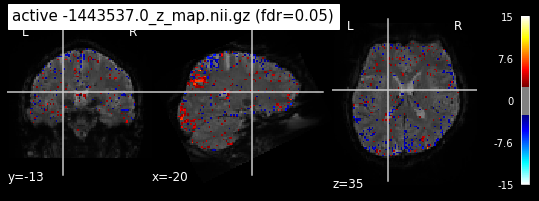

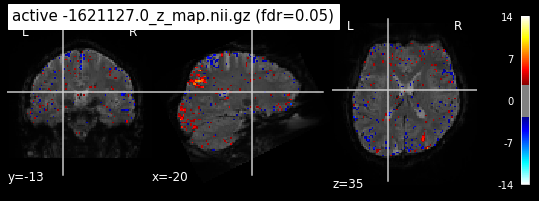

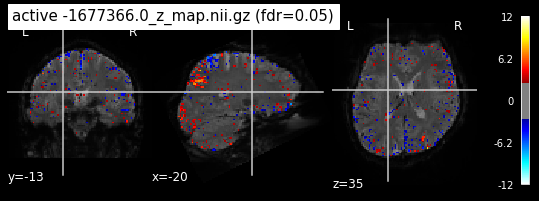

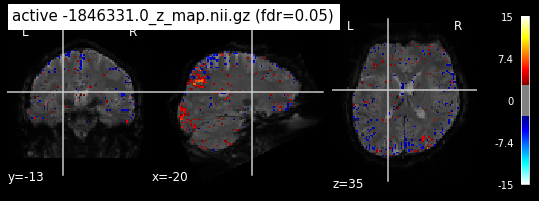

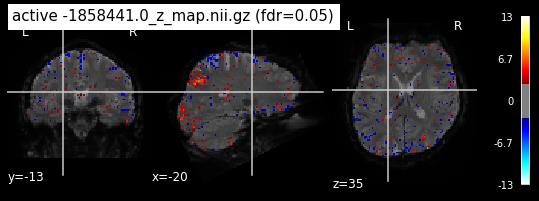

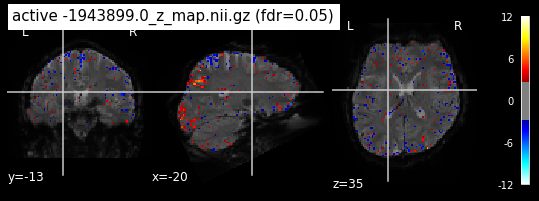

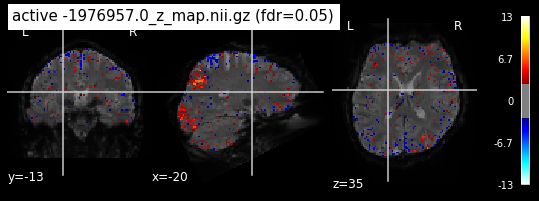

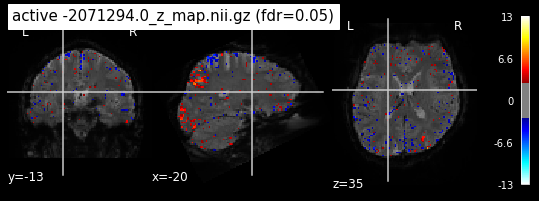

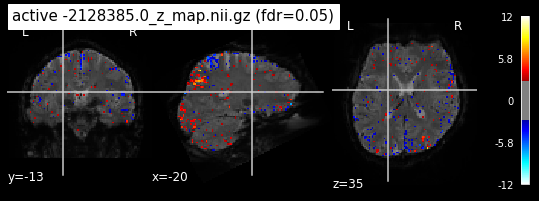

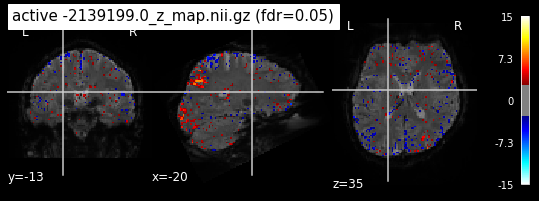

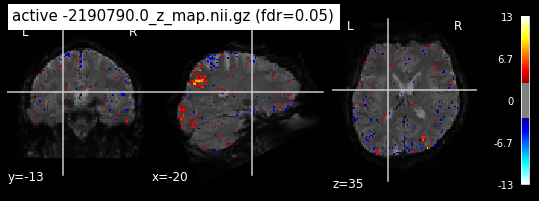

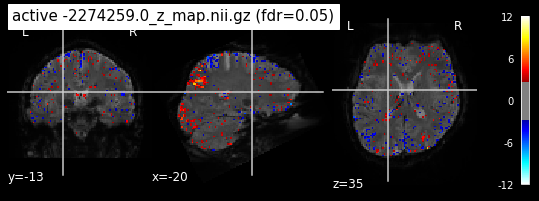

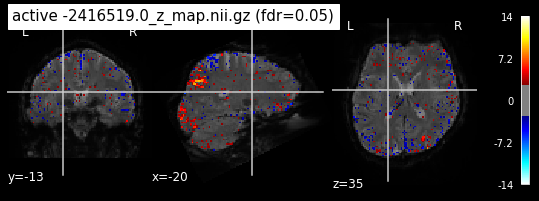

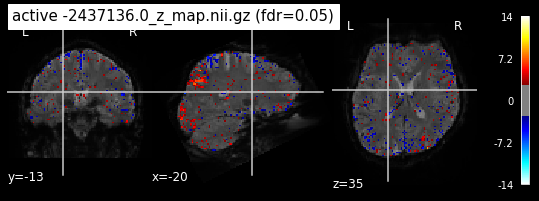

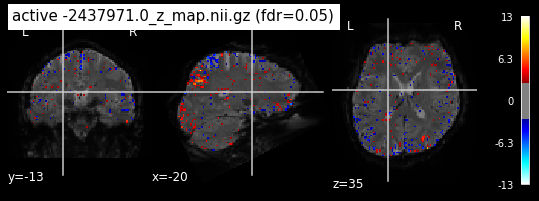

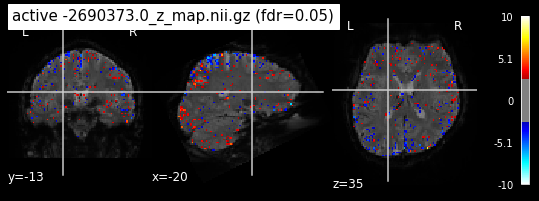

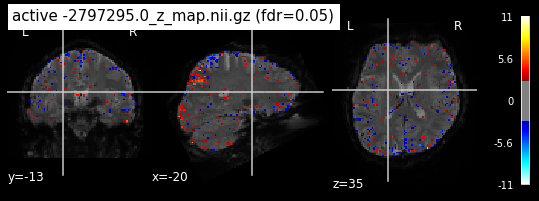

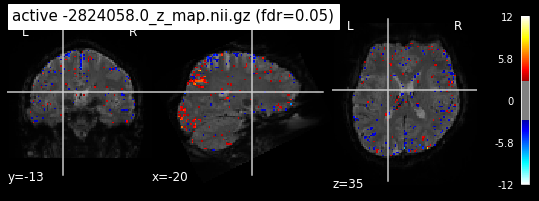

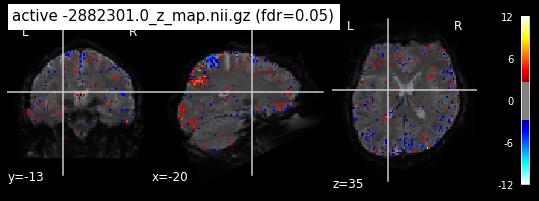

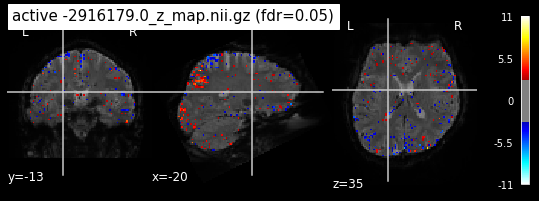

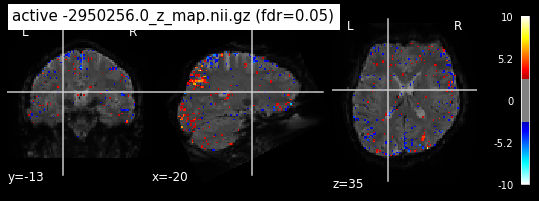

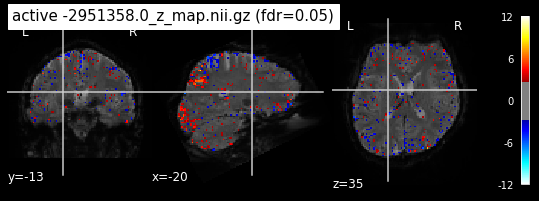

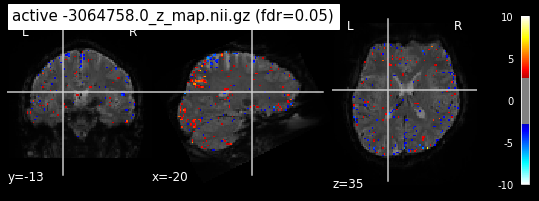

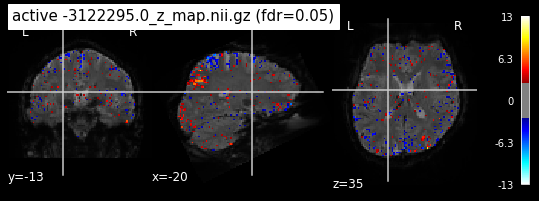

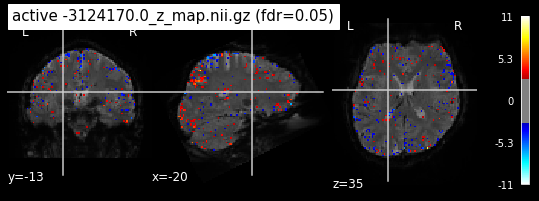

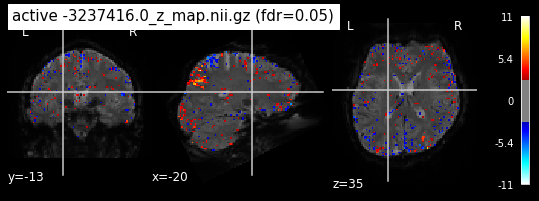

In [50]:
os.chdir('/mnt/c/Users/janos/git/sub01-ses-01-imagery/z_maps')
for file in os.listdir():
    _, threshold = threshold_stats_img(file, alpha=.05, height_control='fdr')
    plot_stat_map(file, bg_img=mean_img_, threshold=threshold,
            display_mode='ortho', cut_coords=coordinates_func, black_bg=True,
            title='{activation} (fdr=0.05)'.format(activation = file))

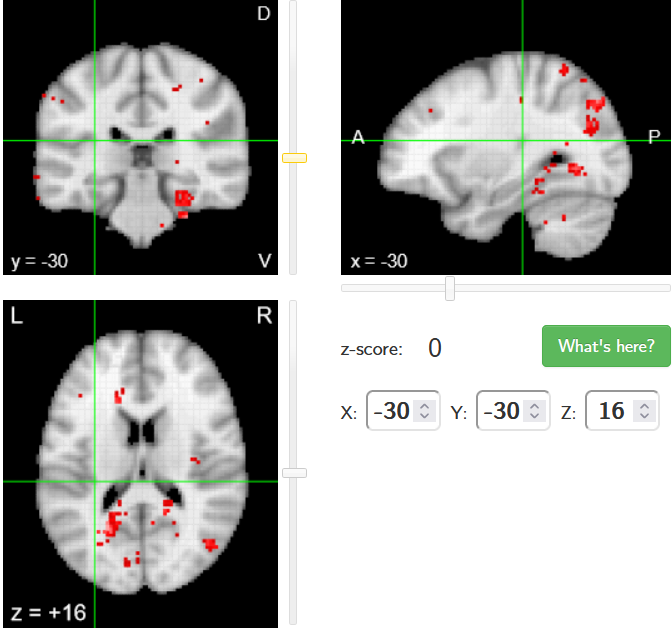

When looking at all 26 plots and comparing it to the one from neurosynth, we see some similarities in the activity pattern. Especially in the occipital lobe (see posterior portion of the x plot) we inspect significant activation in our plots. 

Since the activation pattern from the plotted z-maps seem to be in accordance to the results from neurosynth we can conclude, that the results are as expected and match with prior research.


### **4.3 Plotting design matrices**

For the last step, we should make sure that the design matrices show the same pattern of stimuli onset as the event files.

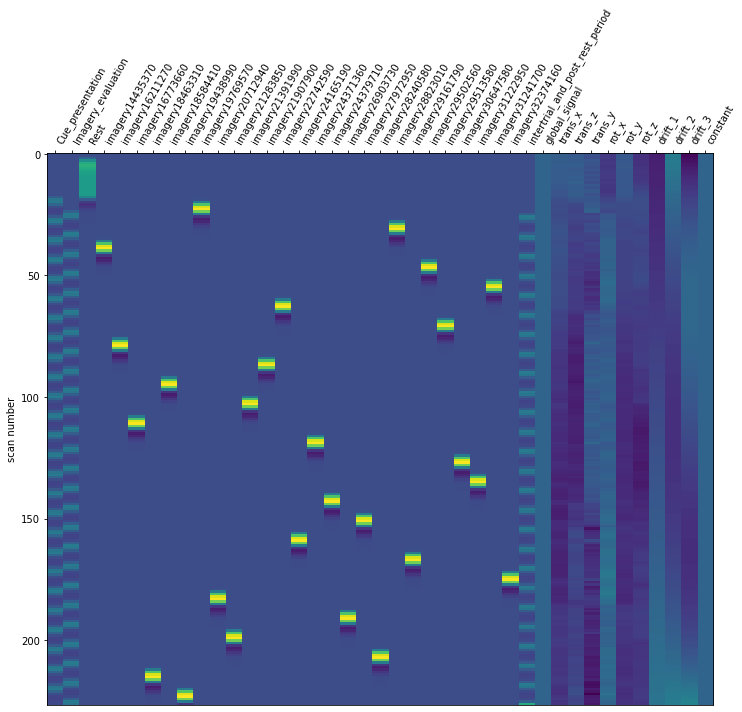

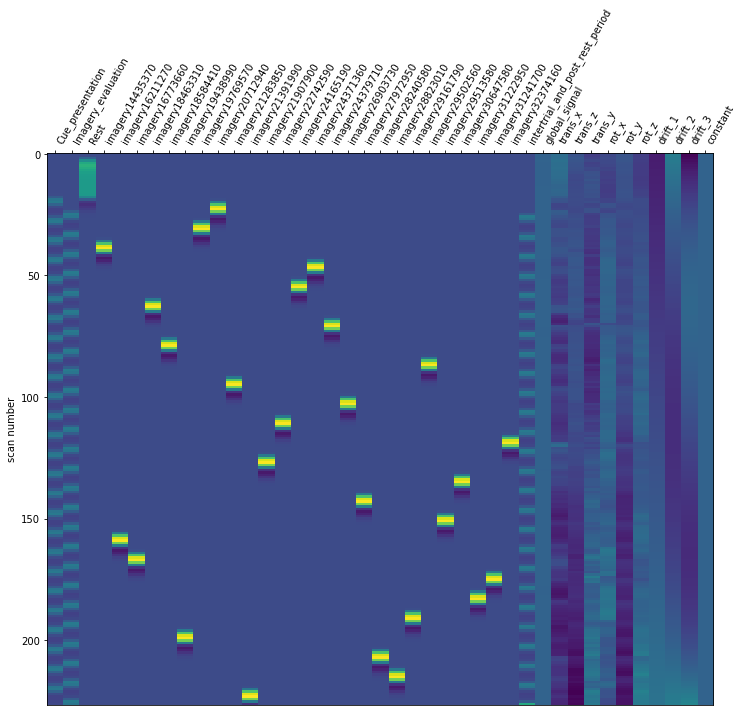

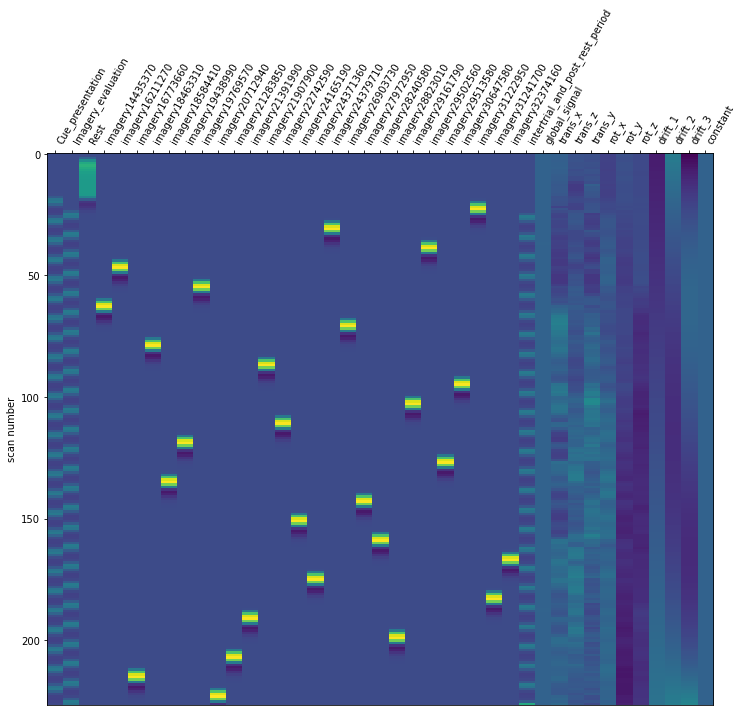

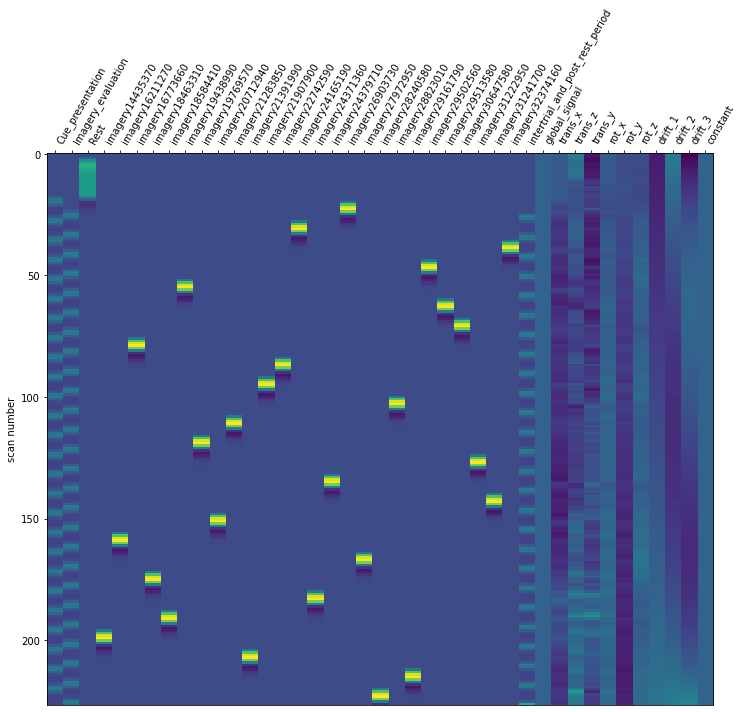

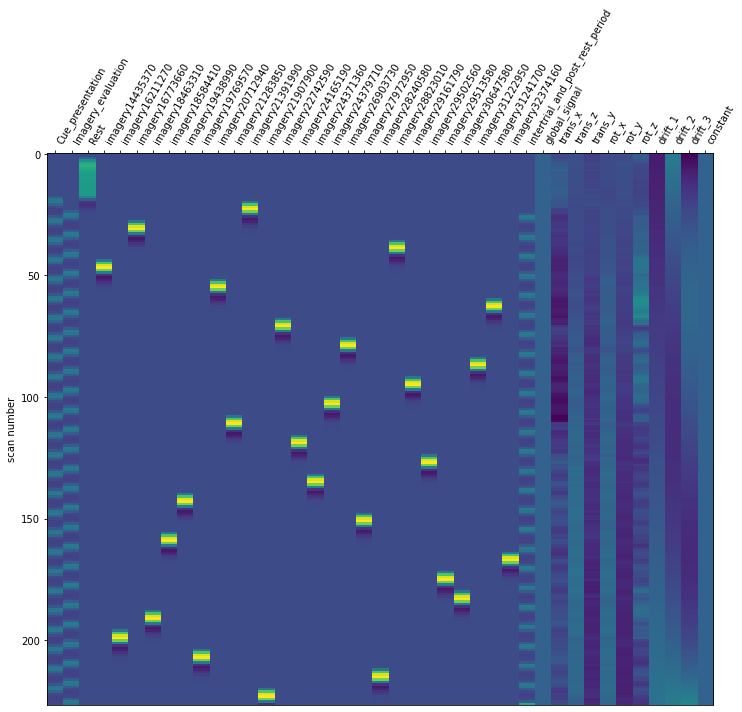

In [51]:
for run, matrix in enumerate(runs):
    design_matrix = glm.design_matrices_[run]
    plot_design_matrix(design_matrix)

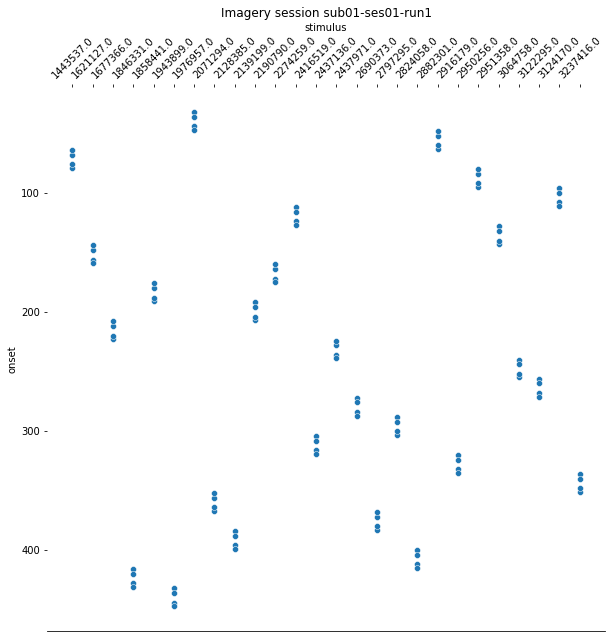

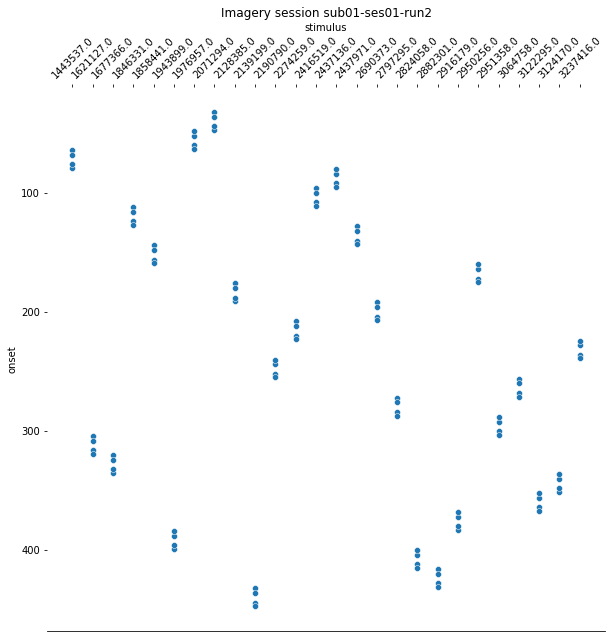

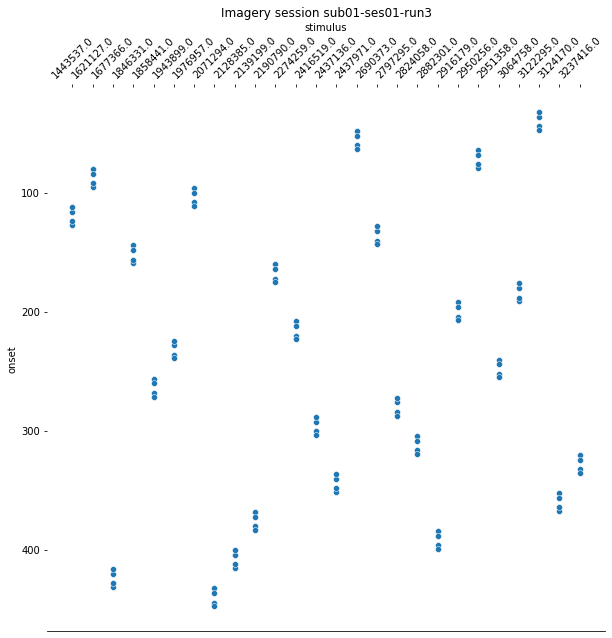

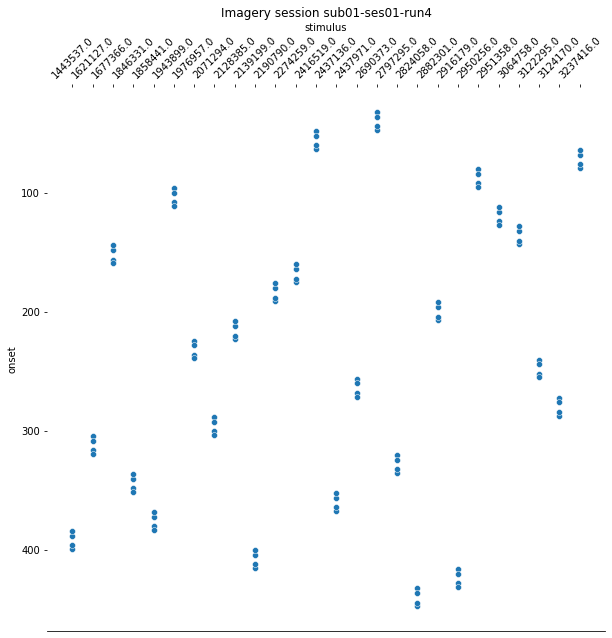

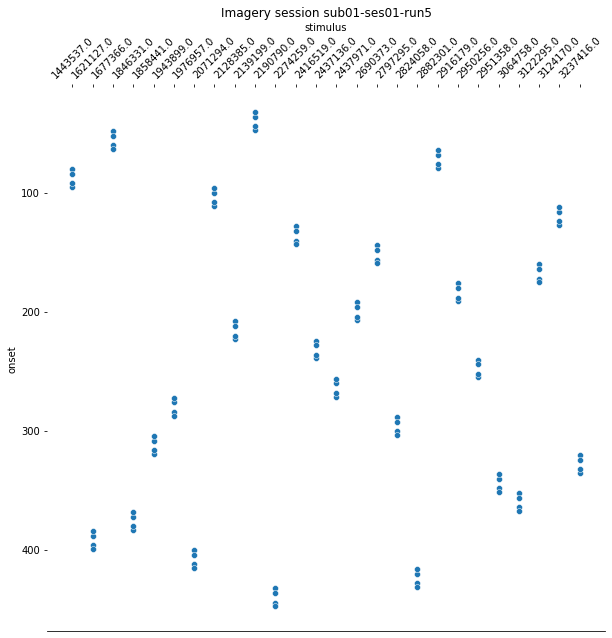

In [52]:
import seaborn as sns
for run,x in enumerate(runs):
    events_all_runs[run].sort_values(by=['category_id'], inplace=True,ascending=True) #sort values, because values are also sorted in design matrix.
    categories = events_all_runs[run]['category_id']
    categories_no_nan = categories.dropna()
    cat_string = [None]*106

    for idx, x in enumerate(categories_no_nan):
        cat_string[idx] = str(x)
    events_all_runs[run]['stimulus'] = cat_string
    
    plt.figure(figsize=(10,10))
    g=sns.scatterplot(data=events_all_runs[run], x='stimulus', y='onset')
    sns.despine(left=True)
    g.invert_yaxis()
    g.xaxis.tick_top()
    g.xaxis.set_label_position('top')
    plt.xticks(rotation=45);
    plt.title('Imagery session sub01-ses01-run{number}'.format(number = run+1));

Since the pattern is equal for the respective runs of the design matrices and event files, we can now proceed with the other sessions.

## **5.0 Calculating z-maps for all 3 remaining sessions**

Since we have the data for three more sessions, we will apply the contrast computation for across runs for each session. This way we can use split the existing z-maps into training and testing data, i.e. cross validating our model.


First, we will cd into the folder that contains three subfolders. Those subfolders contain the data for the sessions 02-04. We will simply repeat all the step from section 3.0. Thus, I wont provide a detailed explanation on what is happening in the individual steps. The code is simply adapted a bit to iterate to all session folders and apply the same steps of section 3.0 to each folder.

Please note, that the functional files have been reprocessed. They are now in the respective subject anatomical space

In [3]:
import os
os.chdir("/mnt/c/Users/janos/git/Sessions_2")
func_images = []

for session in ["01","02","03"]:
    if session == "01":
        for run in ["01","02","03","04","05","06","07","08"]: 
            func_images.append('sub-02_ses-imagery{}_task-imagery_run-{}_desc-preproc_bold.nii.gz'.format(session,run))
    else:
        for run in ["01","02","03","04","05","06"]:    
            func_images.append('sub-02_ses-imagery{}_task-imagery_run-{}_desc-preproc_bold.nii.gz'.format(session,run))

In [49]:
func_images[14:20]

['sub-02_ses-imagery03_task-imagery_run-01_desc-preproc_bold.nii.gz',
 'sub-02_ses-imagery03_task-imagery_run-02_desc-preproc_bold.nii.gz',
 'sub-02_ses-imagery03_task-imagery_run-03_desc-preproc_bold.nii.gz',
 'sub-02_ses-imagery03_task-imagery_run-04_desc-preproc_bold.nii.gz',
 'sub-02_ses-imagery03_task-imagery_run-05_desc-preproc_bold.nii.gz',
 'sub-02_ses-imagery03_task-imagery_run-06_desc-preproc_bold.nii.gz']

In [5]:
from nilearn import plotting
from os import path

In [6]:
#os.mkdir('/mnt/c/Users/janos/git/Sessions_2/z_maps_1')
#os.mkdir('/mnt/c/Users/janos/git/Sessions_2/z_maps_2')
#os.mkdir('/mnt/c/Users/janos/git/Sessions_2/z_maps_3')
#os.mkdir('/mnt/c/Users/janos/git/Sessions_new/z_maps_4')

ses_1 = '/mnt/c/Users/janos/git/Sessions_2/z_maps_1'
ses_2 = '/mnt/c/Users/janos/git/Sessions_2/z_maps_2'
ses_3 = '/mnt/c/Users/janos/git/Sessions_2/z_maps_3'
#ses_4 = '/mnt/c/Users/janos/git/Sessions_new/z_maps_4'

In [68]:
X = []
hrf_model = 'glover'
i = 0
j = 8

for session in ["01","02","03"]:
    if session == "01":
        for run in ["01","02","03","04","05","06","07","08"]:
            confounds__ = pd.read_table('/mnt/c/Users/janos/git/sessions_2/sub02-ses-{}-imagery/sub-02_ses-imagery{}_task-imagery_run-{}_desc-preproc_confounds.tsv'.format(session,session,run))
            reg_no_interest__ = confounds__[['global_signal', 'trans_x','trans_z','trans_y','rot_x','rot_y','rot_z']].copy()
            events_all_ = pd.read_table('/home/jpauli/ds001506/sub-02/ses-imagery{}/func/sub-02_ses-imagery{}_task-imagery_run-{}_events.tsv'.format(session,session,run))
            stimuli_all_ = trialtype(events_all_)
            regressors_of_interest_all_ = events_all_[['onset','duration']]
            regressors_of_interest_all_['trial_type'] = stimuli_all_
            X.append(make_first_level_design_matrix(
            frame_times, regressors_of_interest_all_, drift_model='polynomial', drift_order=3,
            add_regs=reg_no_interest__, add_reg_names=None, hrf_model=hrf_model))
            if run == "08":
                os.chdir("/mnt/c/Users/janos/git/sessions_2/sub02-ses-{}-imagery".format(session))
                glm_ses = glm.fit(func_images[i:j],design_matrices = X[i:j])
                i=8
                j=14
                for index, (contrast_id, contrast_val) in enumerate(condition.items()):
                    z_maps_new=glm_ses.compute_contrast(
                    contrast_val, output_type='z_score')
                    z_image_path = path.join(ses_1, '%s_%s_z_map.nii.gz' % (session, contrast_id))
                    z_maps_new.to_filename(z_image_path)
    else:      
        for run in ["01","02","03","04","05","06"]: 
            confounds__ = pd.read_table('/mnt/c/Users/janos/git/sessions_2/sub02-ses-{}-imagery/sub-02_ses-imagery{}_task-imagery_run-{}_desc-preproc_confounds.tsv'.format(session,session,run))
            reg_no_interest__ = confounds__[['global_signal', 'trans_x','trans_z','trans_y','rot_x','rot_y','rot_z']].copy()
            events_all_ = pd.read_table('/home/jpauli/ds001506/sub-02/ses-imagery{}/func/sub-02_ses-imagery{}_task-imagery_run-{}_events.tsv'.format(session,session,run))
            stimuli_all_ = trialtype(events_all_)
            regressors_of_interest_all_ = events_all_[['onset','duration']]
            regressors_of_interest_all_['trial_type'] = stimuli_all_
            X.append(make_first_level_design_matrix(
            frame_times, regressors_of_interest_all_, drift_model='polynomial', drift_order=3,
            add_regs=reg_no_interest__, add_reg_names=None, hrf_model=hrf_model))
            if run == "06":
                os.chdir("/mnt/c/Users/janos/git/sessions_2/sub02-ses-{}-imagery".format(session))
                glm_ses = glm.fit(func_images[i:j],design_matrices = X[i:j])
                i=i+6
                j=j+6
                for index, (contrast_id, contrast_val) in enumerate(condition.items()):
                    z_maps_new=glm_ses.compute_contrast(
                    contrast_val, output_type='z_score')
                    #if session == "01":
                     #   z_image_path = path.join(ses_1, '%s_%s_z_map.nii.gz' % (session, contrast_id))
                      #  z_maps_new.to_filename(z_image_path)
                    if session == "02":
                        z_image_path = path.join(ses_2, '%s_%s_z_map.nii.gz' % (session, contrast_id))
                        z_maps_new.to_filename(z_image_path)
                    if session == "03":
                        z_image_path = path.join(ses_3, '%s_%s_z_map.nii.gz' % (session, contrast_id))
                        z_maps_new.to_filename(z_image_path)
                #if session == "04":
                 #   z_image_path = path.join(ses_4, '%s_%s_z_map.nii.gz' % (session, contrast_id))
                  #  z_maps_new.to_filename(z_image_path)
          

        
        



 

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 8 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<div class="alert alert-block alert-success">
Great! As we can see below, we end up with three unique lists of z-maps, one for each session across runs. It makes sense to check if the pattern is comparable to that from session one.</div>

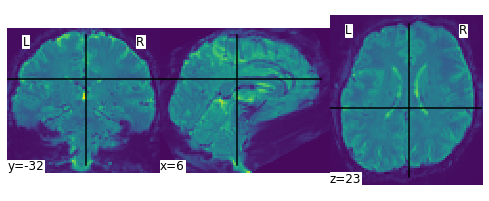

In [4]:
os.chdir("/mnt/c/Users/janos/git/Sessions_new/sub01-ses-01-imagery")
mean_img_new = mean_img(func_images[0])
plot_img(mean_img_new)

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


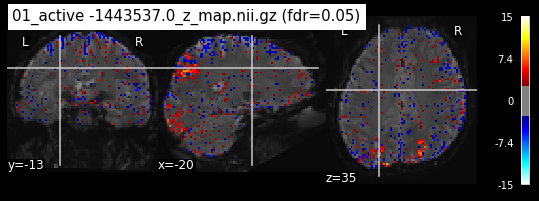

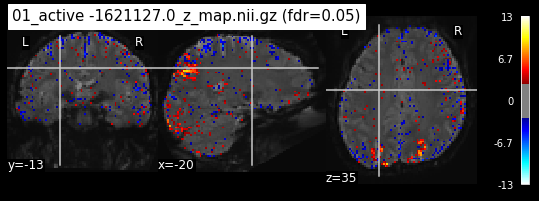

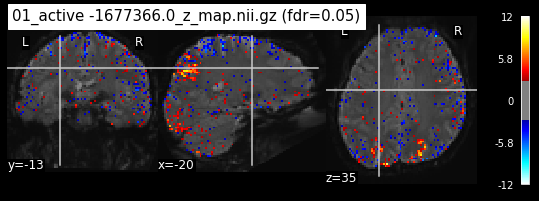

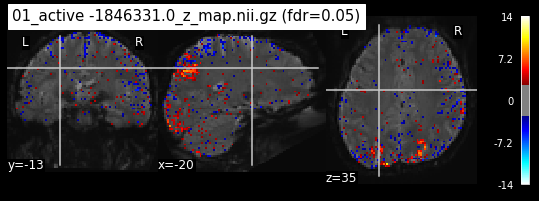

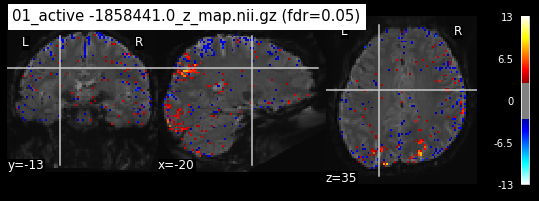

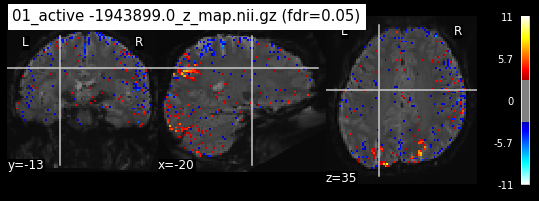

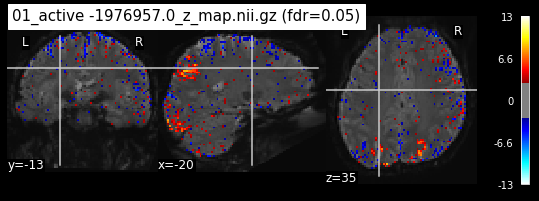

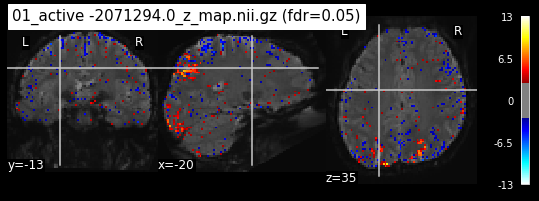

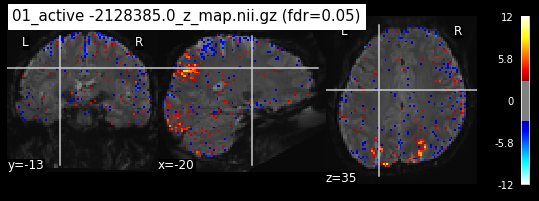

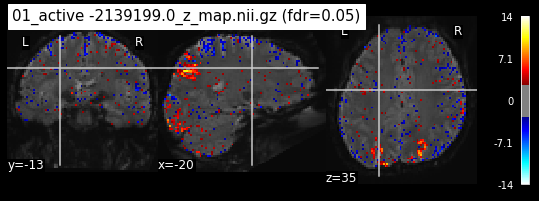

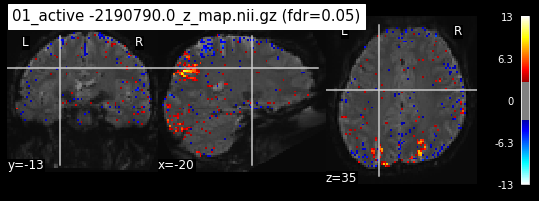

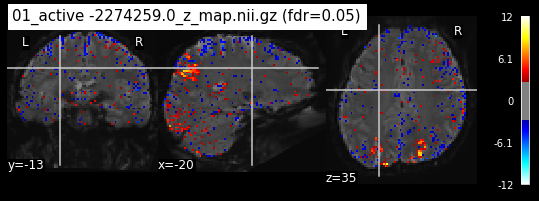

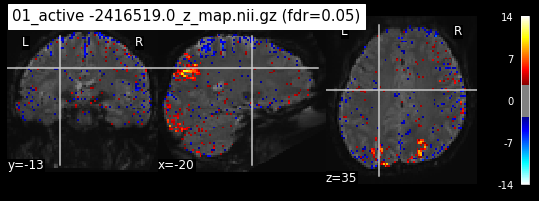

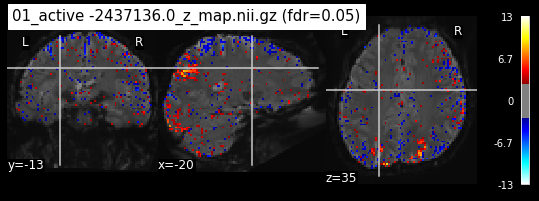

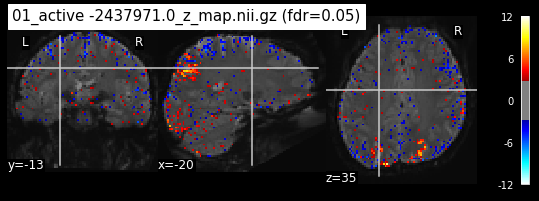

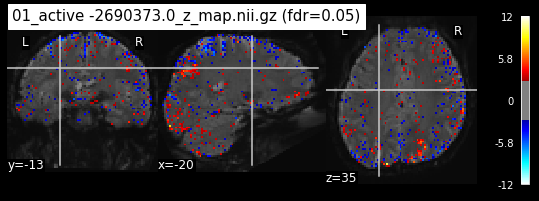

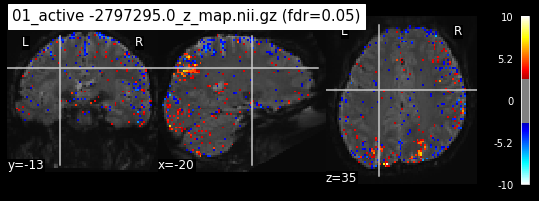

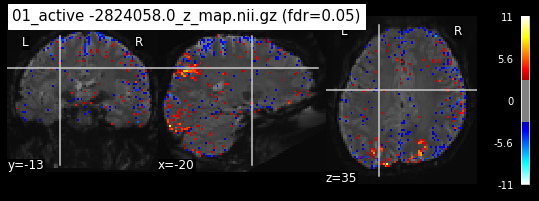

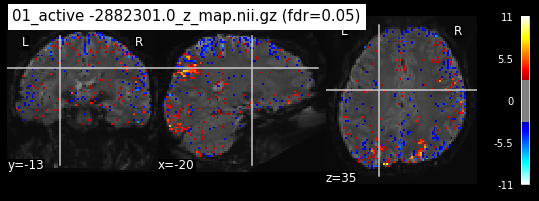

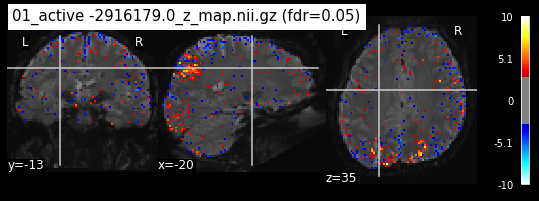

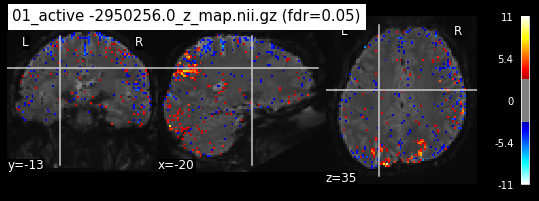

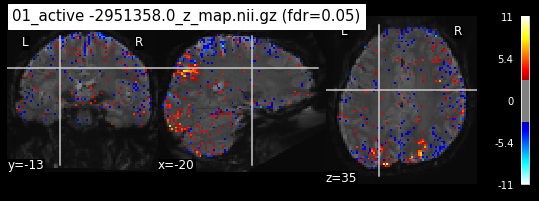

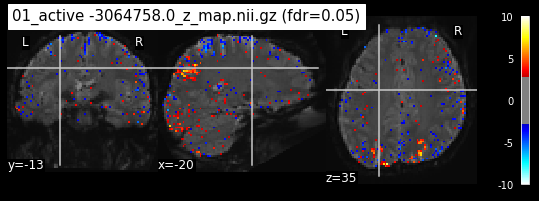

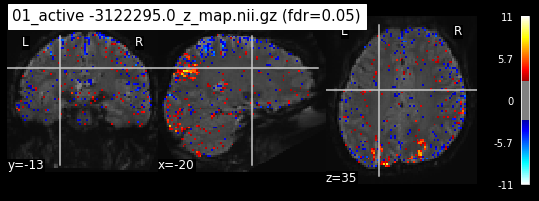

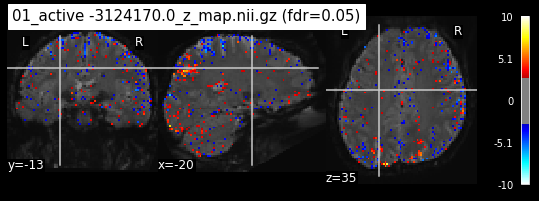

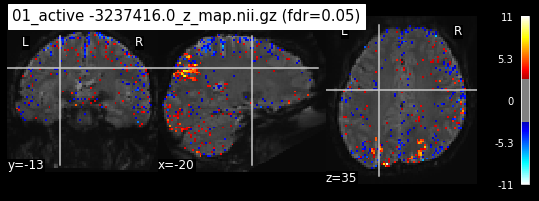

In [6]:
os.chdir('/mnt/c/Users/janos/git/Sessions_new/z_maps_1')
for z_map in os.listdir():
    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(z_map, bg_img=mean_img_new, threshold=threshold,
            display_mode='ortho', cut_coords=coordinates_func, black_bg=True,
            title='{activation} (fdr=0.05)'.format(activation = z_map))

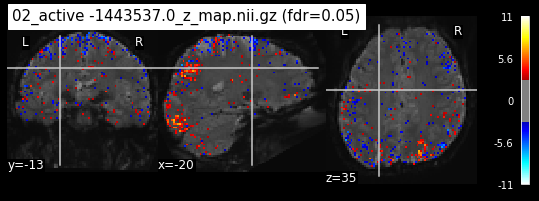

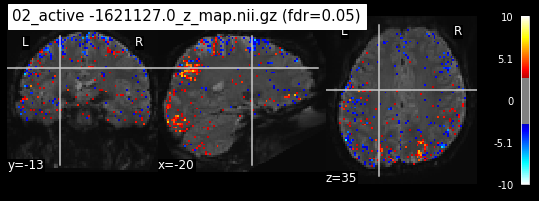

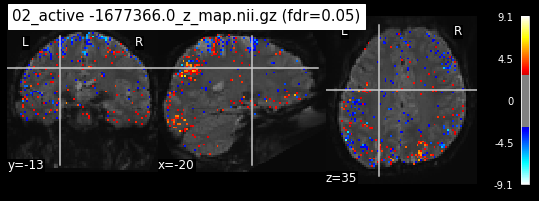

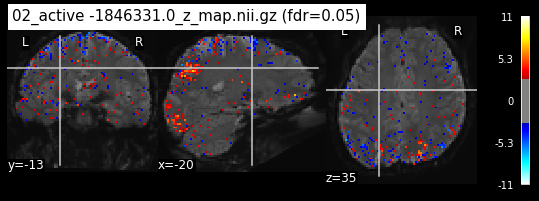

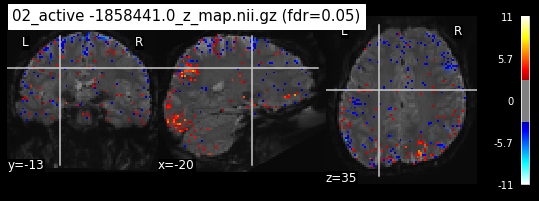

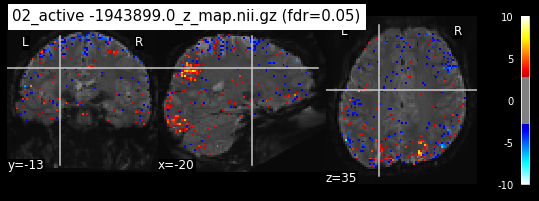

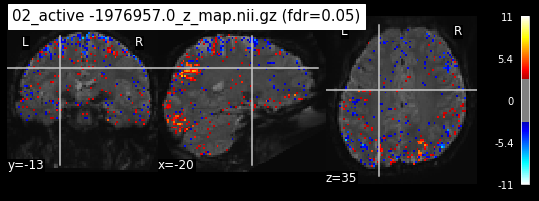

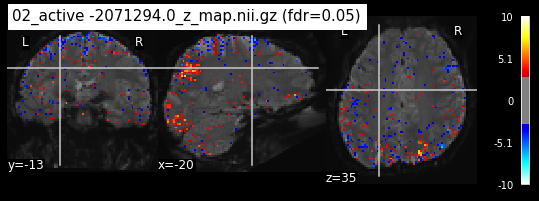

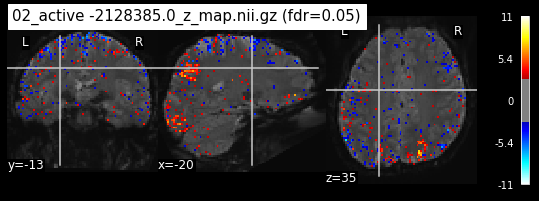

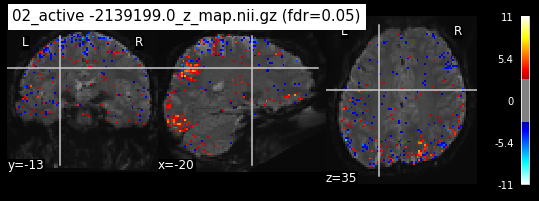

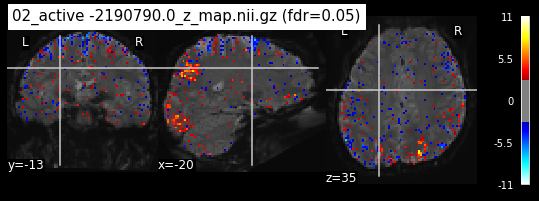

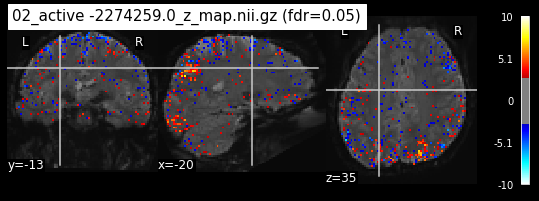

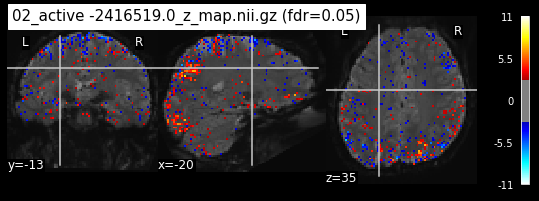

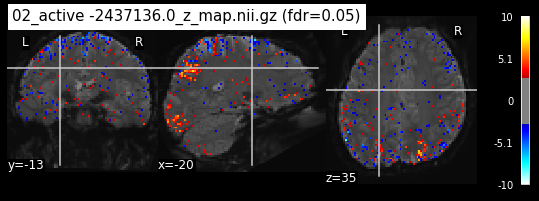

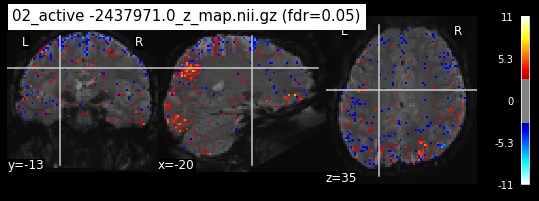

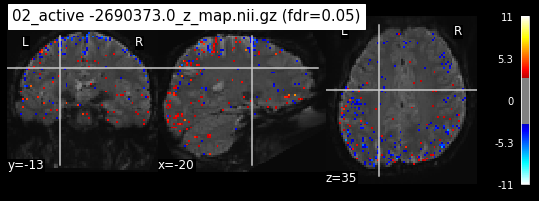

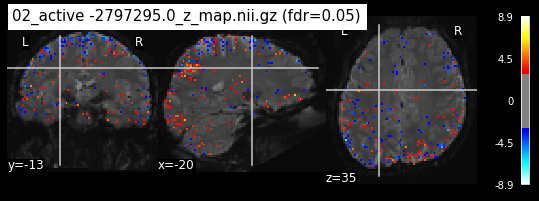

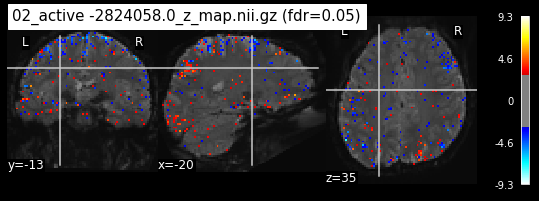

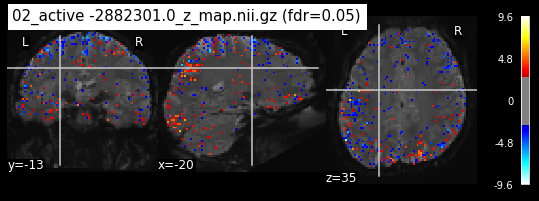

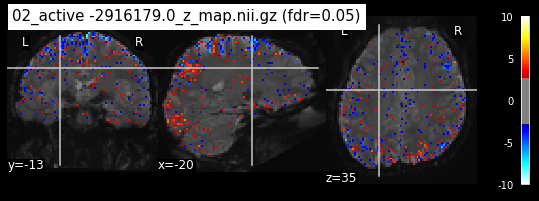

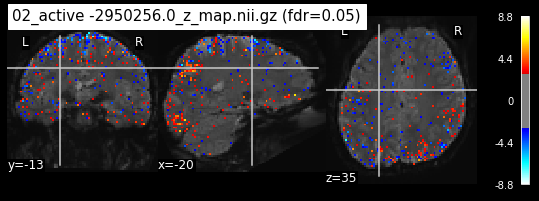

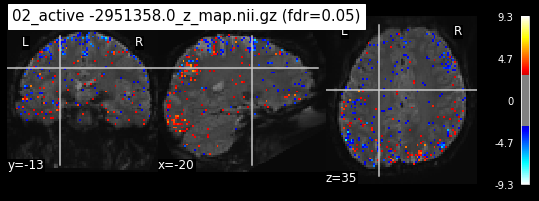

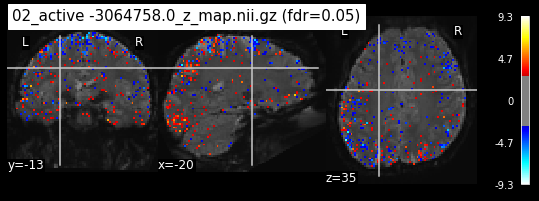

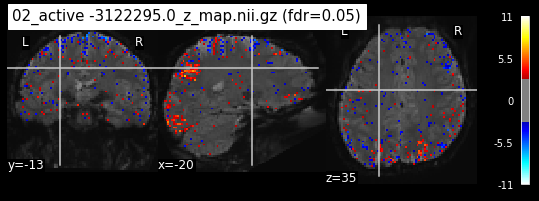

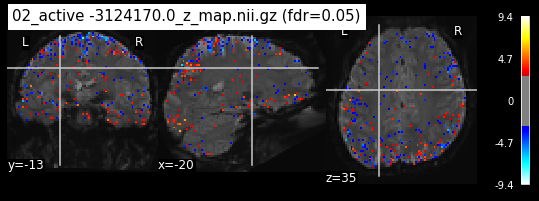

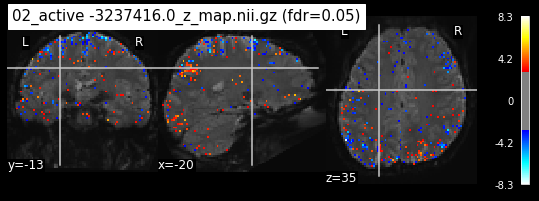

In [8]:
os.chdir('/mnt/c/Users/janos/git/Sessions_new/z_maps_2')
for z_map in os.listdir():
    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(z_map, bg_img=mean_img_new, threshold=threshold,
            display_mode='ortho', cut_coords=coordinates_func, black_bg=True,
            title='{activation} (fdr=0.05)'.format(activation = z_map))

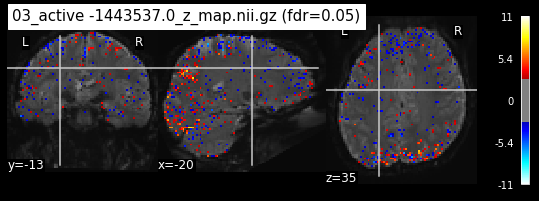

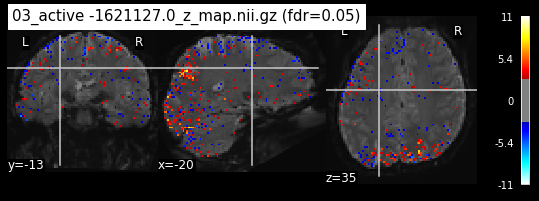

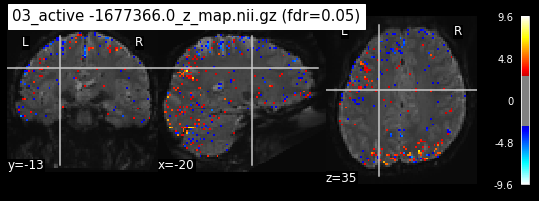

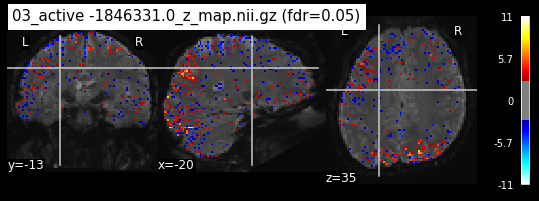

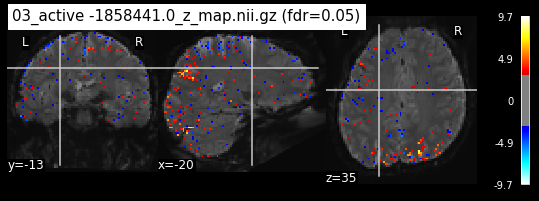

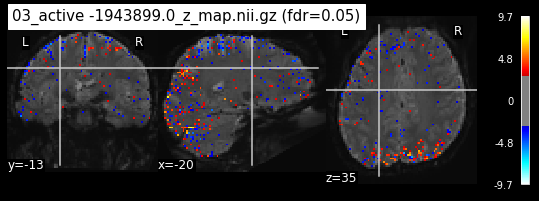

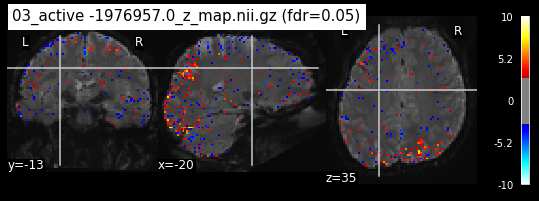

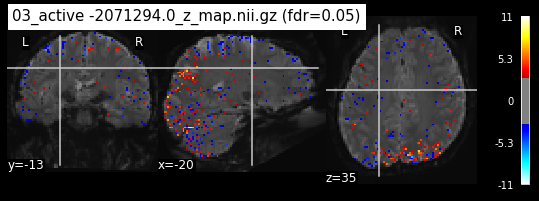

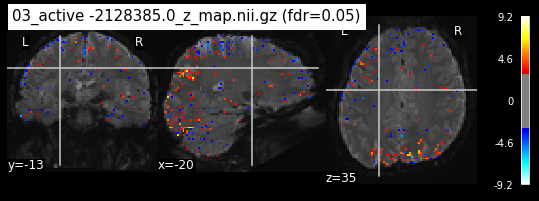

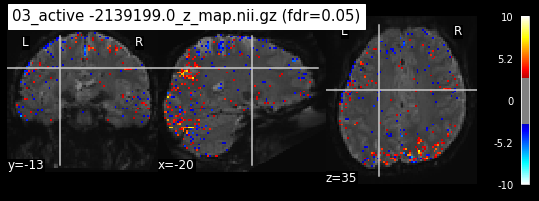

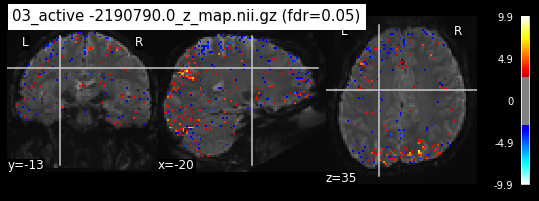

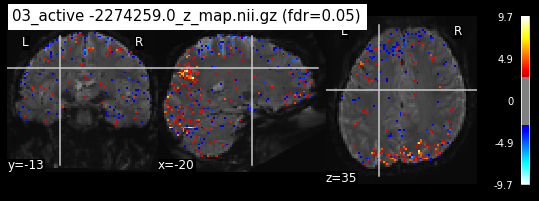

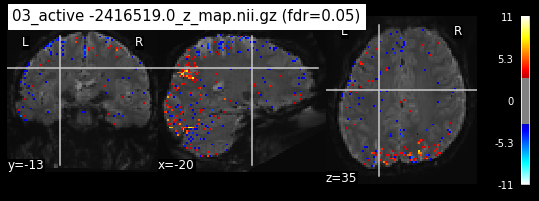

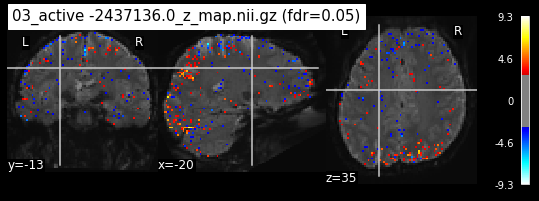

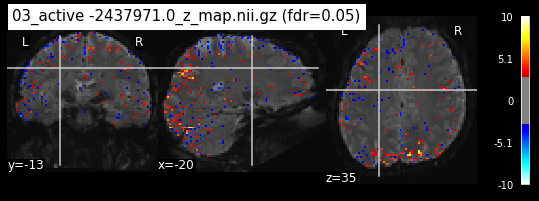

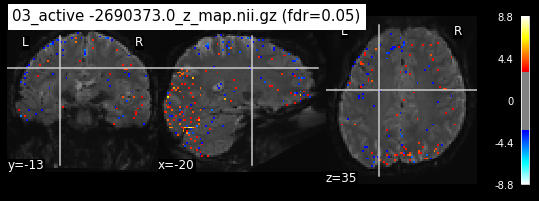

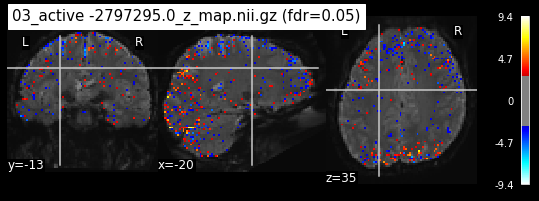

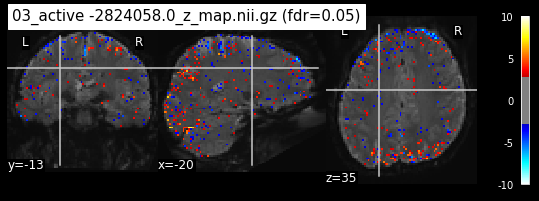

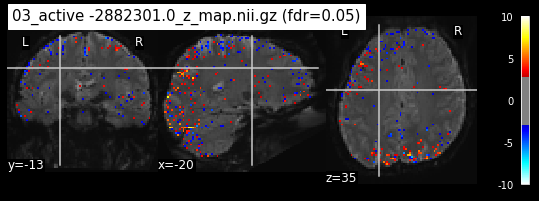

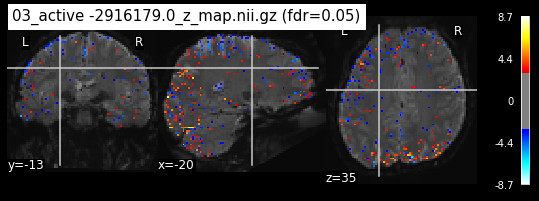

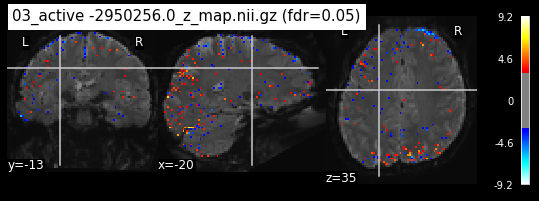

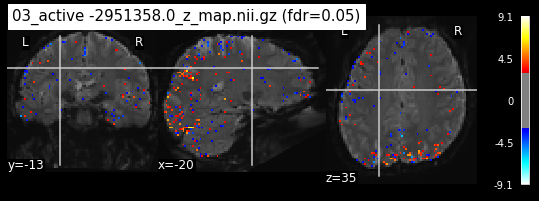

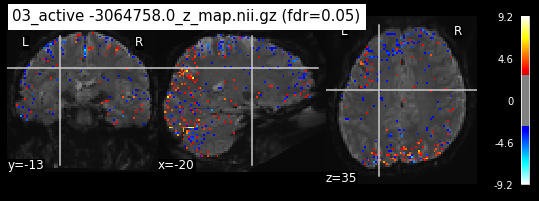

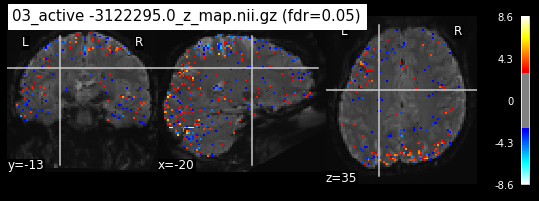

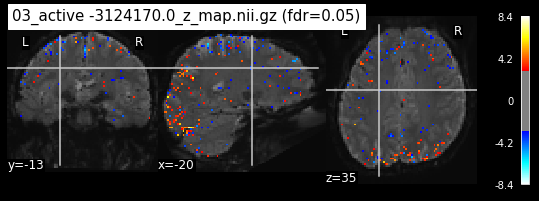

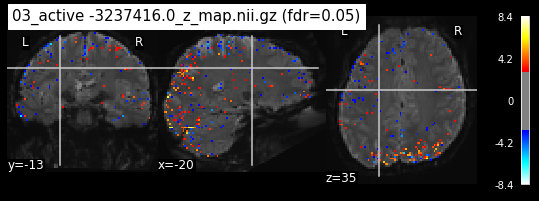

In [9]:
os.chdir('/mnt/c/Users/janos/git/Sessions_new/z_maps_3')
for z_map in os.listdir():
    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(z_map, bg_img=mean_img_new, threshold=threshold,
            display_mode='ortho', cut_coords=coordinates_func, black_bg=True,
            title='{activation} (fdr=0.05)'.format(activation = z_map))

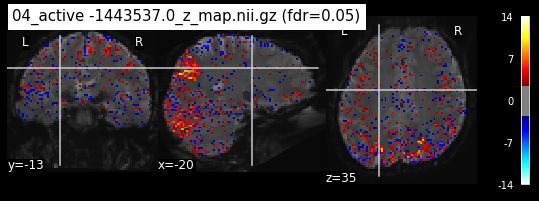

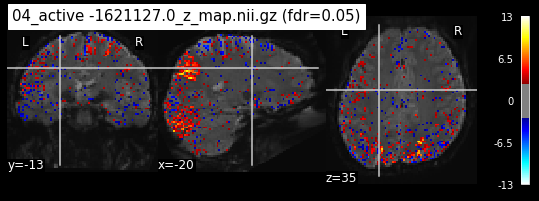

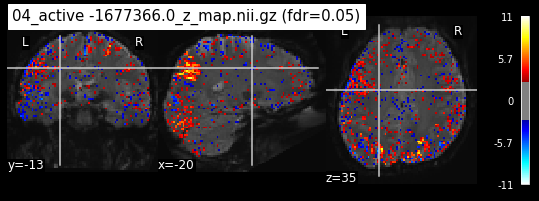

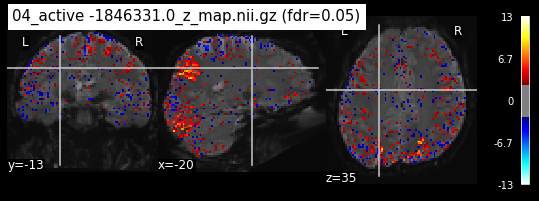

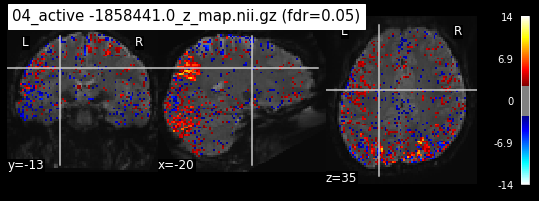

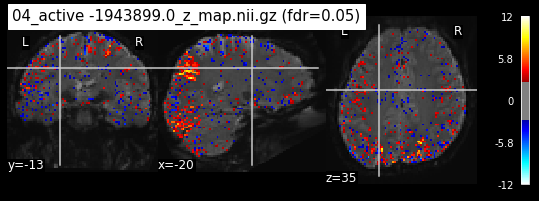

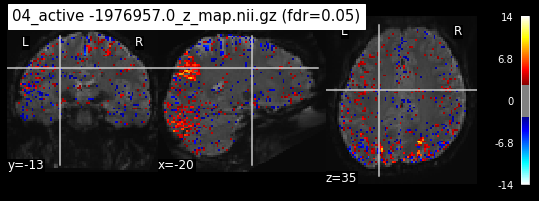

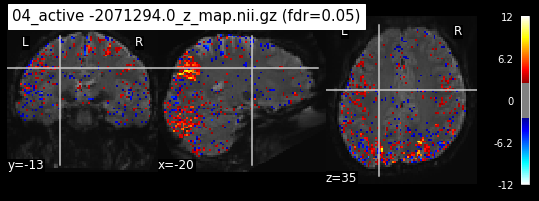

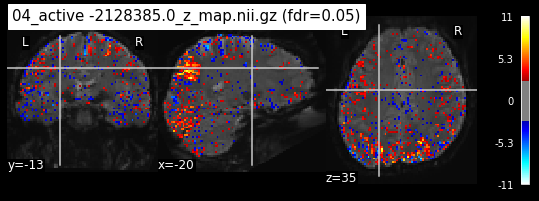

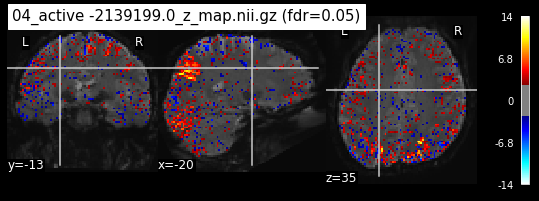

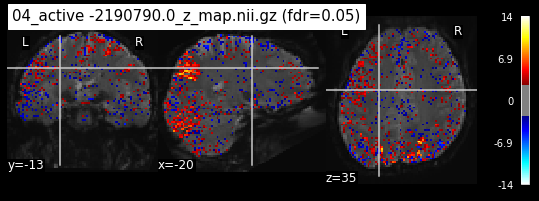

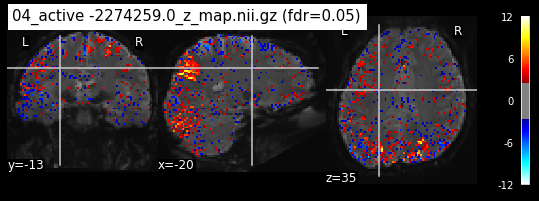

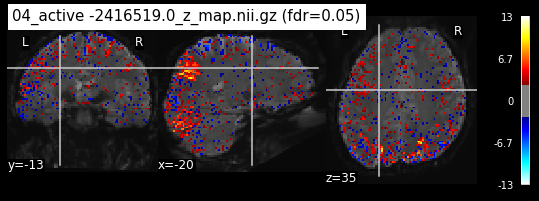

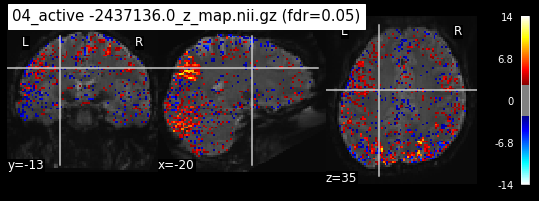

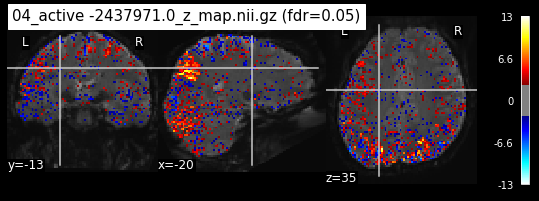

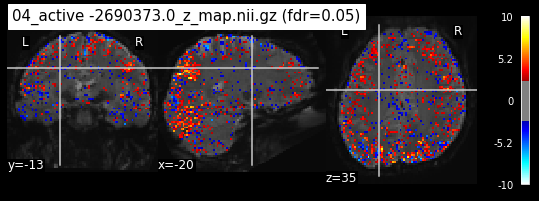

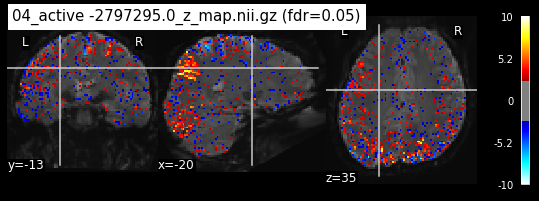

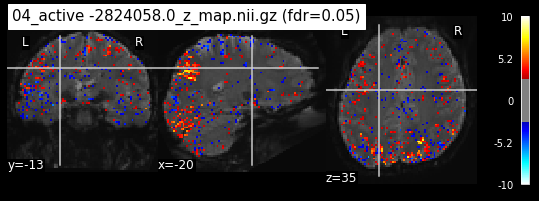

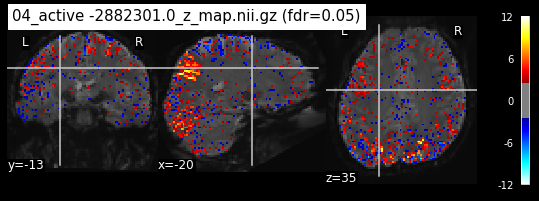

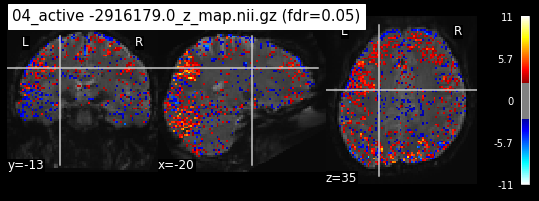

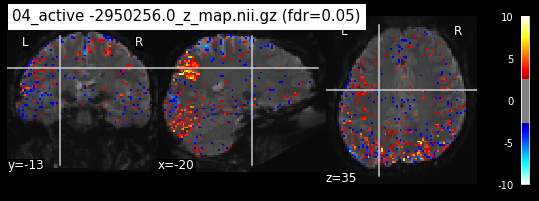

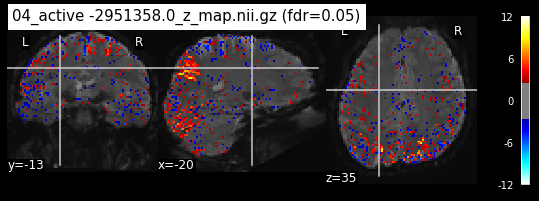

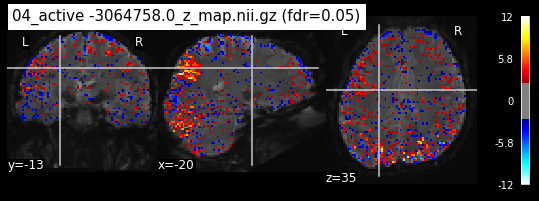

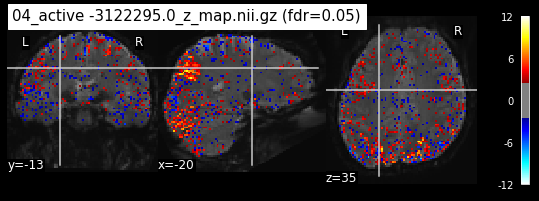

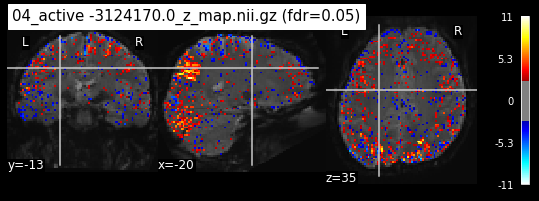

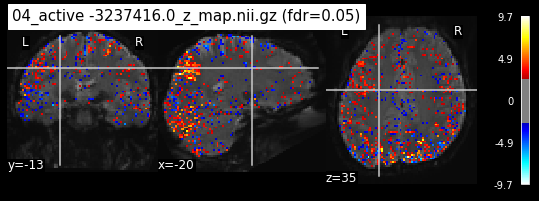

In [10]:
os.chdir('/mnt/c/Users/janos/git/Sessions_new/z_maps_4')
for z_map in os.listdir():
    _, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
    plot_stat_map(z_map, bg_img=mean_img_new, threshold=threshold,
            display_mode='ortho', cut_coords=coordinates_func, black_bg=True,
            title='{activation} (fdr=0.05)'.format(activation = z_map))

## **6.0 Support Vector Machine**

Since we now completed the GLM for all sessions, we should continue with the SVM. Please see the respective notebook "Support_Vector_Machine.ipynb"